In [2]:
import pandas as pd
import numpy as np

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sys
import joblib
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error,mean_absolute_error, recall_score, r2_score, roc_auc_score, roc_curve, classification_report, SCORERS
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4E2B-C9C8

 Directory of C:\Users\gmzyn\++++++CALISMALAR\scout_car_proje\Untitled Folder

29.12.2022  19:16    <DIR>          .
18.12.2022  00:12    <DIR>          ..
26.12.2022  12:39    <DIR>          .ipynb_checkpoints
24.12.2022  02:09           994.234 Baseline.pptx
24.12.2022  02:09             1.374 benioku.md
24.12.2022  02:09            80.530 dummy_test.json
26.12.2022  02:46         7.213.731 Scout_Car
29.12.2022  19:16           289.530 Scout_Car.ipynb
24.12.2022  02:09        58.539.848 scout_car_train.json
24.12.2022  02:09            56.958 sistem.png
               7 File(s)     67.176.205 bytes
               3 Dir(s)  329.011.281.920 bytes free


In [3]:
df=pd.read_json("scout_car_train.json",lines=True)

In [312]:
type(df["Consumption"][0])

list

In [313]:
df["Consumption"][15755]

[['5.3 l/100 km (comb)'], ['6.2 l/100 km (city)'], ['4.7 l/100 km (country)']]

In [314]:
df["Consumption"][15756]

['\n',
 '7.4 l/100 km (comb)',
 '\n',
 '9.2 l/100 km (city)',
 '\n',
 '6.3 l/100 km (country)',
 '\n']

In [315]:
df["Consumption"]

0        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
1        [[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...
2        [[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...
3        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
4        [[3.5 l/100 km (comb)], [4.3 l/100 km (city)],...
                               ...                        
15755    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15756    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...
15757    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15758    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15759    [[6.8 l/100 km (comb)], [8.7 l/100 km (city)],...
Name: Consumption, Length: 15760, dtype: object

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15760 non-null  object 
 1   make_model                     15760 non-null  object 
 2   short_description              15716 non-null  object 
 3   body_type                      15700 non-null  object 
 4   price                          15760 non-null  int64  
 5   vat                            11291 non-null  object 
 6   km                             15760 non-null  object 
 7   registration                   15760 non-null  object 
 8   prev_owner                     9002 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15760 non-null  object 
 11  Type                           15758 non-null  object 
 12  Previous Owners                9189 non-null  

In [61]:
df.isnull().sum()

url                                  0
make_model                           0
short_description                   44
body_type                           60
price                                0
vat                               4469
km                                   0
registration                         0
prev_owner                        6758
kW                               15760
hp                                   0
Type                                 2
Previous Owners                   6571
Next Inspection                  12262
Inspection new                   11871
Warranty                          5373
Full Service                      7631
Non-smoking Vehicle               8656
null                                 0
Make                                 0
Model                                0
Offer Number                      3153
First Registration                1582
Body Color                         594
Paint Type                        5726
Body Color Original      

In [145]:
df1=df[["price","make_model","body_type","km","registration","hp","Type","Gearing Type","Body Color",
            "Nr. of Doors","Nr. of Seats","\nComfort & Convenience\n","Consumption","\nExtras\n","\nSafety & Security\n"]]

In [510]:
df["registration"].tail(60)

15700    01/2019
15701        -/-
15702    01/2019
15703    02/2019
15704    06/2019
15705        -/-
15706    02/2019
15707    03/2019
15708    04/2019
15709        -/-
15710    09/2019
15711    02/2019
15712        -/-
15713    01/2019
15714    02/2019
15715        -/-
15716        -/-
15717    09/2019
15718    04/2019
15719    03/2019
15720        -/-
15721    03/2019
15722        -/-
15723    05/2019
15724    05/2019
15725        -/-
15726        -/-
15727    02/2019
15728    02/2019
15729        -/-
15730    02/2019
15731        -/-
15732    06/2019
15733        -/-
15734    06/2019
15735    04/2019
15736    02/2019
15737        -/-
15738    01/2019
15739    06/2019
15740    03/2019
15741    01/2019
15742    06/2019
15743        -/-
15744    01/2019
15745    04/2019
15746    01/2019
15747    01/2019
15748        -/-
15749    02/2019
15750    05/2019
15751    02/2019
15752    02/2019
15753        -/-
15754    04/2019
15755        -/-
15756    01/2019
15757    03/2019
15758    06/20

In [254]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15760 non-null  int64  
 1   make_model         15760 non-null  object 
 2   body_type          15760 non-null  object 
 3   km                 15760 non-null  float64
 4   registration       15760 non-null  float64
 5   hp                 15760 non-null  object 
 6   Type               15760 non-null  object 
 7   Gearing Type       15760 non-null  object 
 8   Body Color         15760 non-null  object 
 9   Nr. of Doors       15760 non-null  float64
 10  Nr. of Seats       14790 non-null  float64
 11  Comf.&Convenience  14852 non-null  float64
 12  Consumption        15760 non-null  float64
 13  Extras             15760 non-null  int64  
 14  Upholstery         15760 non-null  object 
 15  Displacement       15760 non-null  float64
 16  Safe.&Security     157

In [64]:
df1.loc[10]

price                                                                    17990
make_model                                                             Audi A1
body_type                                                               Sedans
km                                                                   26,415 km
registration                                                           05/2016
hp                                                                       92 kW
Type                                                      [, Used, , Super 95]
Gearing Type                                               [\n, Automatic, \n]
Body Color                                                    [\n, Silver, \n]
Body                                                          [\n, Sedans, \n]
Nr. of Doors                                                           [\n4\n]
Nr. of Seats                                                               NaN
\nComfort & Convenience\n    [Air conditioning, Auto

In [65]:
df1.columns

Index(['price', 'make_model', 'body_type', 'km', 'registration', 'hp', 'Type',
       'Gearing Type', 'Body Color', 'Body', 'Nr. of Doors', 'Nr. of Seats',
       '\nComfort & Convenience\n', 'Consumption', '\nExtras\n',
       '\nSafety & Security\n'],
      dtype='object')

# df1["Nr. of Doors"]

In [103]:
df1["Nr. of Doors"]=df1["Nr. of Doors"].str[0].str.strip("\n")

C:\Users\gmzyn\AppData\Local\Temp\ipykernel_3172\2866174404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Nr. of Doors"]=df1["Nr. of Doors"].str[0].str.strip("\n")


In [145]:
df1.loc[(df1[df1["Nr. of Doors"].isnull()]["body_type"] == "Compact").index ,["Nr. of Doors"]] = "3"
df1.loc[(df1[df1["Nr. of Doors"].isnull()]["body_type"] == "Sedans").index, ["Nr. of Doors"]] = "4"
df1.loc[(df1[df1["Nr. of Doors"].isnull()]["body_type"] == "Van").index, ["Nr. of Doors"]] = "7"

In [148]:
df1["Nr. of Doors"].isnull().any()

False

In [68]:
df1["Body Color"] = df1["Body Color"].str[1]

C:\Users\gmzyn\AppData\Local\Temp\ipykernel_3172\559995620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Body Color"] = df1["Body Color"].str[1]


In [69]:
df1["Body Color"]

0        Black
1          Red
2        Black
3        Brown
4        White
         ...  
15755     Grey
15756     Grey
15757    White
15758     Grey
15759     Grey
Name: Body Color, Length: 15760, dtype: object

# df1["\nExtras\n"]

In [116]:
extra_number = df1[df1["\nExtras\n"].isnull()].index
df1.loc[extra_number, '\nExtras\n'] = '0'

In [117]:
def lenn(x):
    x2 = []
    for i in range(15760):
        x1 = len(x[i])
        x2.append(x1)
    x2 = pd.Series(x2)
    return x2

In [119]:
df1["\nExtras\n"].value_counts()

[Alloy wheels]                                                                                              3211
0                                                                                                           2936
[Alloy wheels, Touch screen]                                                                                 688
[Alloy wheels, Voice Control]                                                                                571
[Alloy wheels, Touch screen, Voice Control]                                                                  536
                                                                                                            ... 
[Alloy wheels, Catalytic Converter, Ski bag, Sport package, Sport seats, Sport suspension, Touch screen]       1
[Catalytic Converter, Roof rack, Sport package, Touch screen, Voice Control]                                   1
[Alloy wheels, Handicapped enabled, Touch screen]                                               

In [118]:
lenn(df1["\nExtras\n"])

0        3
1        4
2        2
3        3
4        4
        ..
15755    2
15756    3
15757    1
15758    2
15759    2
Length: 15760, dtype: int64

In [121]:
df1["\nExtras\n"]=lenn(df1["\nExtras\n"])

C:\Users\gmzyn\AppData\Local\Temp\ipykernel_3172\4180040494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["\nExtras\n"]=lenn(df1["\nExtras\n"])


In [122]:
df1["\nExtras\n"]

0        3
1        4
2        2
3        3
4        4
        ..
15755    2
15756    3
15757    1
15758    2
15759    2
Name: \nExtras\n, Length: 15760, dtype: int64

# df1["Nr. of Seats"]

In [100]:
df1["Nr. of Seats"]=df1["Nr. of Seats"].str[0].str.strip("\n")

C:\Users\gmzyn\AppData\Local\Temp\ipykernel_3172\2091678273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Nr. of Seats"]=df1["Nr. of Seats"].str[0].str.strip("\n")


In [248]:
df1["Nr. of Seats"]

0        5.0
1        4.0
2        4.0
3        4.0
4        5.0
        ... 
15755    5.0
15756    5.0
15757    7.0
15758    7.0
15759    5.0
Name: Nr. of Seats, Length: 15760, dtype: float64

In [261]:
df1.loc[df1.body_type=='Sedans', 'Nr. of Seats']=5.0
df1.loc[df1.body_type=='Compact', 'Nr. of Seats']=5.0
df1.loc[df1.body_type=='Station wagon', 'Nr. of Seats']=5.0
df1.loc[df1.body_type=='Van', 'Nr. of Seats']=5.0
df1.loc[df1.body_type=='Coupe', 'Nr. of Seats']=2.0
df1.loc[df1.body_type=='Convertible', 'Nr. of Seats']=4.0
df1.loc[df1.body_type=='Transporter', 'Nr. of Seats']=3.0
df1.loc[df1.body_type=='Off-Road', 'Nr. of Seats']=5.0 
df1.loc[df1.body_type=='Other', 'Nr. of Seats']=4.0
df1['Nr. of Seats'].fillna(4)

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
15755    5.0
15756    5.0
15757    5.0
15758    5.0
15759    5.0
Name: Nr. of Seats, Length: 15760, dtype: float64

In [265]:
df1['Nr. of Seats'].value_counts(dropna=False)

5.0    15356
4.0      292
3.0       87
2.0       25
Name: Nr. of Seats, dtype: int64

In [260]:
df1["body_type"].value_counts(dropna=False)

Sedans           7881
Station wagon    3516
Compact          3126
Van               777
Other             284
Transporter        87
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

# df1["\nComfort & Convenience\n"]

In [79]:
df1[df1["\nComfort & Convenience\n"].isnull()]["make_model"]

8               Audi A1
29              Audi A1
52              Audi A1
166             Audi A1
189             Audi A1
              ...      
15632    Renault Espace
15645    Renault Espace
15646    Renault Espace
15695    Renault Espace
15705    Renault Espace
Name: make_model, Length: 908, dtype: object

In [80]:
df1["\nComfort & Convenience\n"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15760 entries, 0 to 15759
Series name: 
Comfort & Convenience

Non-Null Count  Dtype 
--------------  ----- 
14852 non-null  object
dtypes: object(1)
memory usage: 123.2+ KB


In [106]:
x2=[]
for x in df1["\nComfort & Convenience\n"]:
        if isinstance(x,float):
            x2.append(x)
        else:
            
            x2.append(len(x))
            #x2 = pd.Series(x2)
        print(x2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [107]:
x2

[16,
 9,
 13,
 16,
 17,
 15,
 10,
 2,
 nan,
 3,
 16,
 17,
 11,
 16,
 11,
 3,
 12,
 10,
 11,
 15,
 18,
 15,
 3,
 14,
 5,
 15,
 5,
 2,
 5,
 nan,
 9,
 5,
 7,
 12,
 5,
 8,
 6,
 4,
 11,
 6,
 13,
 13,
 10,
 8,
 8,
 12,
 5,
 9,
 11,
 12,
 4,
 5,
 nan,
 7,
 7,
 4,
 10,
 6,
 6,
 17,
 13,
 8,
 11,
 8,
 10,
 13,
 8,
 11,
 16,
 9,
 14,
 18,
 15,
 16,
 21,
 16,
 16,
 18,
 16,
 3,
 11,
 15,
 19,
 14,
 17,
 14,
 6,
 12,
 17,
 15,
 16,
 14,
 15,
 9,
 1,
 3,
 5,
 9,
 4,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 17,
 3,
 3,
 11,
 3,
 16,
 12,
 14,
 17,
 6,
 17,
 14,
 15,
 6,
 11,
 18,
 14,
 4,
 16,
 17,
 17,
 3,
 3,
 15,
 11,
 6,
 17,
 11,
 11,
 13,
 14,
 9,
 6,
 22,
 17,
 16,
 11,
 14,
 18,
 16,
 15,
 9,
 9,
 15,
 13,
 7,
 14,
 19,
 15,
 7,
 10,
 14,
 11,
 15,
 15,
 16,
 19,
 9,
 18,
 nan,
 15,
 10,
 10,
 17,
 4,
 17,
 18,
 9,
 16,
 18,
 13,
 11,
 16,
 15,
 14,
 16,
 13,
 15,
 13,
 17,
 14,
 4,
 nan,
 13,
 12,
 15,
 6,
 15,
 12,
 2,
 3,
 16,
 12,
 15,
 4,
 13,
 8,
 19,
 16,
 11,
 18,
 10,
 13,
 15,
 13,
 14,
 1

In [108]:
df1["\nComfort & Convenience\n"]=x2

C:\Users\gmzyn\AppData\Local\Temp\ipykernel_3172\1619554923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["\nComfort & Convenience\n"]=x2


In [109]:
len(df1["\nComfort & Convenience\n"])

15760

In [110]:
df1["\nComfort & Convenience\n"]

0        16.0
1         9.0
2        13.0
3        16.0
4        17.0
         ... 
15755    20.0
15756    23.0
15757    24.0
15758    10.0
15759    11.0
Name: \nComfort & Convenience\n, Length: 15760, dtype: float64

# df1["Body Color"]

In [90]:
new=[]
for i in df1["Body Color"]:
    if isinstance(i,float):
        new.append(i)
    else:
        new.append(i[1])
    
    

In [91]:
new

['Black',
 'Red',
 'Black',
 'Brown',
 'White',
 'White',
 'Red',
 'Grey',
 'White',
 'Black',
 'Silver',
 'White',
 'Grey',
 'Black',
 'Grey',
 'Blue',
 'White',
 'Black',
 'Black',
 'White',
 'Black',
 'Grey',
 'Black',
 'White',
 'White',
 'Blue',
 'Black',
 'White',
 'Black',
 'Black',
 'Black',
 'Brown',
 'Black',
 'White',
 'White',
 'White',
 'Red',
 'Red',
 'Silver',
 'Black',
 'Grey',
 'Grey',
 'Black',
 'Black',
 'Black',
 'Grey',
 'Black',
 'Black',
 'Black',
 'White',
 'Black',
 'White',
 'Black',
 'Black',
 'Black',
 'White',
 'Black',
 'Blue',
 'Red',
 'Black',
 'Black',
 'Red',
 'Black',
 'White',
 'Grey',
 'White',
 'Grey',
 'Silver',
 'Silver',
 nan,
 'Black',
 'Black',
 'White',
 'Red',
 'Grey',
 'Blue',
 'Black',
 'White',
 'White',
 'Silver',
 'Black',
 'Blue',
 'Red',
 'Grey',
 'Brown',
 'Black',
 'White',
 'Red',
 'White',
 'Black',
 'Red',
 'White',
 'Grey',
 'Red',
 'Black',
 'Black',
 'Silver',
 'Black',
 'Black',
 'Black',
 'White',
 'White',
 'Black',
 'Blue'

In [92]:
df1["Body Color"]=new

C:\Users\gmzyn\AppData\Local\Temp\ipykernel_3172\3018853430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Body Color"]=new


In [97]:
df1["Body Color"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15760 entries, 0 to 15759
Series name: Body Color
Non-Null Count  Dtype 
--------------  ----- 
15166 non-null  object
dtypes: object(1)
memory usage: 123.2+ KB


In [625]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,15750,15751,15752,15753,15754,15755,15756,15757,15758,15759
price,15770,14500,14640,14500,15090,16422,14480,16700,17990,18500,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
km,"56,013 km","80,000 km","83,450 km","73,000 km","63,668 km","62,111 km","14,986 km","57,000 km","16,103 km","11,300 km",...,"3,500 km","8,500 km",100 km,- km,"1,000 km",- km,"9,900 km",15 km,10 km,- km
registration,01/2016,03/2017,02/2016,08/2016,02/2016,03/2016,02/2016,02/2016,06/2017,05/2018,...,05/2019,02/2019,02/2019,-/-,04/2019,-/-,01/2019,03/2019,06/2019,01/2019
hp,66 kW,141 kW,85 kW,66 kW,85 kW,85 kW,66 kW,85 kW,70 kW,85 kW,...,147 kW,165 kW,118 kW,147 kW,165 kW,147 kW,165 kW,146 kW,147 kW,165 kW
Type,"['', 'Used', '', 'Diesel (Particulate Filter)']","['', 'Used', '', 'Gasoline']","['', 'Used', '', 'Diesel (Particulate Filter)']","['', 'Used', '', 'Diesel (Particulate Filter)']","['', 'Used', '', 'Diesel (Particulate Filter)']","['', 'Used', '', 'Diesel (Particulate Filter)']","['', 'Used', '', 'Diesel (Particulate Filter)']","['', 'Used', '', 'Diesel (Particulate Filter)']","['', 'Used', '', 'Gasoline']","['', 'Used', '', 'Diesel (Particulate Filter)']",...,"['', 'Demonstration', '', 'Diesel (Particulate...","['', 'Demonstration', '', 'Regular/Benzine E10...","['', 'Pre-registered', '', 'Diesel (Particulat...","['', 'New', '', 'Diesel (Particulate Filter)']","['', 'Demonstration', '', 'Super 95']","['', 'New', '', 'Diesel (Particulate Filter)']","['', 'Used', '', 'Super 95 / Super Plus 98 (Pa...","['', 'Pre-registered', '', 'Diesel']","['', 'Pre-registered', '', 'Diesel']","['', 'Demonstration', '', 'Super 95']"
Gearing Type,"['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']",...,"['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']"
Body Color,Black,Red,Black,Brown,White,White,Red,Grey,White,Black,...,Black,Blue,White,Black,White,Grey,Grey,White,Grey,Grey
Nr. of Doors,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


# SAVED NEW CSV FİLE 

In [241]:
#df1.to_csv("Scout_Car",index=False)

In [706]:
#df1.to_csv("Scout_Car2",index=False)

In [239]:
#df1.to_csv("Scout_Car3",index=False)

In [240]:
df1=pd.read_csv("Scout_Car3")

# df["Consumption"]

In [127]:
df1["Consumption"]=df["Consumption"]

In [128]:
an=df1["Consumption"]

In [129]:
an

0        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
1        [[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...
2        [[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...
3        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
4        [[3.5 l/100 km (comb)], [4.3 l/100 km (city)],...
                               ...                        
15755    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15756    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...
15757    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15758    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15759    [[6.8 l/100 km (comb)], [8.7 l/100 km (city)],...
Name: Consumption, Length: 15760, dtype: object

In [130]:
list4=[]

In [131]:
list4=[]
for i in an:
    
    if isinstance(i,float):
        
        list4.append(i)       
    else:
        i.pop(0)
        i.pop(1)
        list4.append(i)      

In [132]:
list1=[]

In [133]:
list1=[]
for i in list4:
    if isinstance(i,float):
        list1.append(i)       
    else:
        i=str(i)
        b=i.strip("[]")
        list1.append(b)      

In [134]:
list10=[]

In [135]:
list10=[]
for i in list1:
    if isinstance(i,float):
        list10.append(i)  
    else:
        if len(i)<30:
            list10.append(i)
        else:
            i=i[24:45]
            list10.append(i)

In [136]:
list11=[]

In [137]:
list11=[]
for i in list10:
    if isinstance(i,float):
        list11.append(i) 
    else:
        i=i[0:4]        
        i=i.strip("l'\/")
        
        list11.append(i)

In [138]:
list12=[]

In [139]:
list12=[]
for i in list11:
    if isinstance(i,float):
        list12.append(i) 
    else:
        i=i[0:4]        
        i=i.strip()
        list12.append(i)

In [140]:
#list12

In [141]:
df1["Consumption"]=list12

In [142]:
df1["Consumption"].value_counts(dropna=False)

NaN     1888
5        667
5.8      621
4.5      571
4.3      524
        ... 
16.        1
11.5       1
64         1
66         1
9.7        1
Name: Consumption, Length: 85, dtype: int64

In [143]:
df1.loc[df1["Consumption"]==""]["Consumption"].index

Int64Index([  168,   249,   356,   377,   456,   482,   526,   595,   611,
              668,
            ...
            15550, 15572, 15632, 15644, 15667, 15688, 15689, 15691, 15713,
            15747],
           dtype='int64', length=511)

In [144]:
df1["Consumption"][8]

nan

In [145]:
df1.loc[df1.loc[df1["Consumption"]==""].index, "Consumption"] = df1["Consumption"][8]

In [151]:
df1["Consumption"][3579]

"n',"

In [152]:
df1.loc[df1["Consumption"]=="n',"].index

Int64Index([ 3579,  3582,  3584,  5694,  8391,  8464,  8482,  8581,  8718,
             8989,  9033,  9054,  9181, 11786],
           dtype='int64')

In [153]:
df1.loc[df1.loc[df1["Consumption"]=="n',"].index, "Consumption"] = df1["Consumption"][8]

In [154]:
df1["Consumption"]=pd.to_numeric(df1["Consumption"], downcast='float')

In [155]:
df1.loc[df1["Consumption"]>11]["Consumption"].index

Int64Index([530, 2170, 2172, 2186, 2213, 4052, 4065, 4511, 4513, 9658, 10408,
            12419, 14434],
           dtype='int64')

In [156]:
df1.loc[df1.loc[df1["Consumption"]>11].index, "Consumption"] = df1["Consumption"][8]

In [157]:
df1["Consumption"].value_counts(dropna=False)

NaN    2426
5.0     667
5.8     621
4.5     571
4.3     524
       ... 
9.5       2
8.8       2
1.0       2
3.6       2
9.7       1
Name: Consumption, Length: 73, dtype: int64

In [237]:
df1["Consumption"] = df1["Consumption"].fillna(method="bfill")

In [390]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,15750,15751,15752,15753,15754,15755,15756,15757,15758,15759
price,15770,14500,14640,14500,15090,16422,14480,16700,17990,18500,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
km,56013,80000,83450,73000,63668,62111,14986,57000,16103,11300,...,3500,8500,100,-,1000,-,9900,15,10,-
registration,2016,2017,2016,2016,2016,2016,2016,2016,2017,2018,...,2019,2019,2019,,2019,,2019,2019,2019,2019
hp,66,141,85,66,85,85,66,85,70,85,...,147,165,118,147,165,147,165,146,147,165
Type,Diesel (Particulate Filter),Gasoline,Diesel (Particulate Filter),Diesel (Particulate Filter),Diesel (Particulate Filter),Diesel (Particulate Filter),Diesel (Particulate Filter),Diesel (Particulate Filter),Gasoline,Diesel (Particulate Filter),...,Diesel (Particulate Filter),Regular/Benzine E10 91,Diesel (Particulate Filter),Diesel (Particulate Filter),Super 95,Diesel (Particulate Filter),Super 95 / Super Plus 98 (Particulate Filter),Diesel,Diesel,Super 95
Gearing Type,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,...,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic
Body Color,Black,Red,Black,Brown,White,White,Red,Grey,White,Black,...,Black,Blue,White,Black,White,Grey,Grey,White,Grey,Grey
Nr. of Doors,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


# df1["Gearing Type"]

In [232]:
df1["Gearing Type"]=df["Gearing Type"]

In [233]:
gear_2=[]
for i in df1["Gearing Type"]:
    if  isinstance(i,float):
        gear_2.append(i)
    else:
        i.pop(0)
        i.pop(1)
        
        gear_2.append(i)

In [234]:
df1["Gearing Type"]

0        [Automatic]
1        [Automatic]
2        [Automatic]
3        [Automatic]
4        [Automatic]
            ...     
15755    [Automatic]
15756    [Automatic]
15757    [Automatic]
15758    [Automatic]
15759    [Automatic]
Name: Gearing Type, Length: 15760, dtype: object

In [236]:
list15=[]

In [237]:
list15=[]
for i in df1["Gearing Type"]:
    if isinstance(i,float):
        list15.append(i)       
    else:
        for a in i:
            list15.append(a)  

In [238]:
list15

['Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Manual',
 'Manual',
 'Manual',
 'Automatic',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Manual',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic',
 'Automatic

In [239]:
df1["Gearing Type"]=list15

In [240]:
df1["Gearing Type"]

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15755    Automatic
15756    Automatic
15757    Automatic
15758    Automatic
15759    Automatic
Name: Gearing Type, Length: 15760, dtype: object

# df1["km"]

In [260]:
df1["km"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15760 entries, 0 to 15759
Series name: km
Non-Null Count  Dtype 
--------------  ----- 
15760 non-null  object
dtypes: object(1)
memory usage: 123.2+ KB


In [246]:
df1["km"]

0        56,013 km
1        80,000 km
2        83,450 km
3        73,000 km
4        63,668 km
           ...    
15755         - km
15756     9,900 km
15757        15 km
15758        10 km
15759         - km
Name: km, Length: 15760, dtype: object

In [261]:
km_1=[]
for i in df["km"]:
    i=i[:-3]
    i=i.replace(',',"")
    km_1.append(i)

In [262]:
df1["km"]=km_1

In [267]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15760 non-null  int64  
 1   make_model         15760 non-null  object 
 2   body_type          15760 non-null  object 
 3   km                 15760 non-null  float64
 4   registration       15760 non-null  float64
 5   hp                 15760 non-null  object 
 6   Type               15760 non-null  object 
 7   Gearing Type       15760 non-null  object 
 8   Body Color         15760 non-null  object 
 9   Nr. of Doors       15760 non-null  float64
 10  Nr. of Seats       15760 non-null  float64
 11  Comf.&Convenience  14852 non-null  float64
 12  Consumption        15760 non-null  float64
 13  Extras             15760 non-null  int64  
 14  Upholstery         15760 non-null  object 
 15  Displacement       15760 non-null  float64
 16  Safe.&Security     157

# df1["registration"]

In [32]:
df1["registration"].tail()

15755    2019.0
15756    2019.0
15757    2019.0
15758    2019.0
15759    2019.0
Name: registration, dtype: float64

In [513]:
regist=[]
for i in df1["registration"]:
    i=i[3:]
    regist.append(i)

In [514]:
regist

['2016',
 '2017',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2018',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2018',
 '2017',
 '2016',
 '2018',
 '2017',
 '2016',
 '2016',
 '2018',
 '2018',
 '2016',
 '2016',
 '2016',
 '2018',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2018',
 '2017',
 '2018',
 '2017',
 '2017',
 '2017',
 '2018',
 '2018',
 '2016',
 '2018',
 '2016',
 '2016',
 '2017',
 '2018',
 '2018',
 '2018',
 '2016',
 '2017',
 '2017',
 '2016',
 '2016',
 '2017',
 '2016',
 '2016',
 '2018',
 '2018',
 '2016',
 '2017',
 '2018',
 '2018',
 '2018',
 '2018',
 '2016',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2016',
 '2018',
 '2018',
 '2018',
 

In [515]:
df1["registration"]=regist

In [516]:
df1["registration"]

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15755        
15756    2019
15757    2019
15758    2019
15759    2019
Name: registration, Length: 15760, dtype: object

In [517]:
df1["registration"].value_counts()

2018    4472
2016    3634
2017    3248
2019    2824
        1582
Name: registration, dtype: int64

In [551]:
ak_12=df1[df1["registration"]==""]["km"]

In [538]:
df1[df1["km"]<""]["registration"].index

Int64Index([], dtype='int64')

In [555]:
df1.loc[df1[ak_12,"km"<1000]]

TypeError: '<' not supported between instances of 'str' and 'int'

In [561]:
type(ak_12)

pandas.core.series.Series

In [568]:
ak_12.loc["km"]

KeyError: 'km'

# df1["hp"]

In [494]:
df1["hp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15760 entries, 0 to 15759
Series name: hp
Non-Null Count  Dtype 
--------------  ----- 
15760 non-null  object
dtypes: object(1)
memory usage: 123.2+ KB


In [281]:
df1["hp"]

0         66 kW
1        141 kW
2         85 kW
3         66 kW
4         85 kW
          ...  
15755    147 kW
15756    165 kW
15757    146 kW
15758    147 kW
15759    165 kW
Name: hp, Length: 15760, dtype: object

In [284]:
hp_1=[]
for i in df1["hp"]:
    i=i[:-3]
    hp_1.append(i)

In [286]:
df1["hp"]=hp_1

In [371]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,15750,15751,15752,15753,15754,15755,15756,15757,15758,15759
price,15770,14500,14640,14500,15090,16422,14480,16700,17990,18500,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
km,56013,80000,83450,73000,63668,62111,14986,57000,16103,11300,...,3500,8500,100,-,1000,-,9900,15,10,-
registration,2016,2017,2016,2016,2016,2016,2016,2016,2017,2018,...,2019,2019,2019,,2019,,2019,2019,2019,2019
hp,66,141,85,66,85,85,66,85,70,85,...,147,165,118,147,165,147,165,146,147,165
Type,Diesel (Particulate Filter),Gasoline,Diesel (Particulate Filter),Diesel (Particulate Filter),Diesel (Particulate Filter),Diesel (Particulate Filter),Diesel (Particulate Filter),Diesel (Particulate Filter),Gasoline,Diesel (Particulate Filter),...,Diesel (Particulate Filter),Regular/Benzine E10 91,Diesel (Particulate Filter),Diesel (Particulate Filter),Super 95,Diesel (Particulate Filter),Super 95 / Super Plus 98 (Particulate Filter),Diesel,Diesel,Super 95
Gearing Type,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,...,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic
Body Color,Black,Red,Black,Brown,White,White,Red,Grey,White,Black,...,Black,Blue,White,Black,White,Grey,Grey,White,Grey,Grey
Nr. of Doors,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


# df1["Type"]

In [38]:
type(df1["Type"])

pandas.core.series.Series

In [39]:
type(df["Type"])

pandas.core.series.Series

In [40]:
df1["Type"][0]

'Diesel (Particulate Filter)'

In [41]:
df["Type"][0]

['', 'Used', '', 'Diesel (Particulate Filter)']

In [42]:
type_1=[]
for i in df["Type"]:
    if isinstance(i,float):
        type_1.append(i)
    else:
        i=i[-1]
        type_1.append(i)                

In [43]:
df1["Type"]=type_1

In [44]:
df1["Type"].value_counts().head(60)

Diesel (Particulate Filter)                                                                                  4275
Super 95                                                                                                     3302
Gasoline                                                                                                     3145
Diesel                                                                                                       2953
Super 95 / Regular/Benzine 91                                                                                 422
Regular/Benzine 91                                                                                            350
Super E10 95                                                                                                  324
Super 95 (Particulate Filter)                                                                                 265
Super 95 / Super E10 95                                                                 

In [45]:
saple_list=["Super Plus 98","Super E10 95","Super 95 / Regular/Benzine 91","Benzine 91 ","Gasoline"]
obj1 = list(enumerate(saple_list))
print(obj1)

[(0, 'Super Plus 98'), (1, 'Super E10 95'), (2, 'Super 95 / Regular/Benzine 91'), (3, 'Benzine 91 '), (4, 'Gasoline')]


In [46]:
df1["Type"].value_counts().head(30)

Diesel (Particulate Filter)                                                                                  4275
Super 95                                                                                                     3302
Gasoline                                                                                                     3145
Diesel                                                                                                       2953
Super 95 / Regular/Benzine 91                                                                                 422
Regular/Benzine 91                                                                                            350
Super E10 95                                                                                                  324
Super 95 (Particulate Filter)                                                                                 265
Super 95 / Super E10 95                                                                 

In [47]:
saple_list=["Super Plus 98","Super E10 95","Super 95 / Regular/Benzine 91","Benzine 91 ","Gasoline",
            "Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98","Regular/Benzine 91","Super 95",
           "Regular/Benzine 91","Super 95 / Super Plus 98","Super 95 / Super E10 95","Regular/Benzine 91 (Particulate Filter)",
           'Super 95 / Regular/Benzine 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Regular/Benzine E10 91',
           'Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super 95 / Super E10 95 / Super Plus E10 98',
           'Super E10 95 / Super 95',
        'Super 95 / Regular/Benzine 91 / Super Plus 98','Super 95 (Particulate Filter)',"Super 95 / Super E10 95 (Particulate Filter)",
             "Gasoline (Particulate Filter)","Super E10 95 / Super 95 / Super Plus 98 / Super Plus E10 98",
            "Super 95 / Super Plus 98 (Particulate Filter)", 
"Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super E10 95 / Super Plus E10 98",
"Regular/Benzine E10 91",
"Super 95 / Super Plus 98 / Super E10 95",
"Super 95 / Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super E10 95 / Super Plus E10 98",
"Super E10 95 (Particulate Filter)",
"Regular/Benzine 91 / Regular/Benzine E10 91",                                                                                                    
"Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95",
"Super E10 95 / Super Plus E10 98",
"Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)",
"Super 95 / Super E10 95 / Super Plus E10 98 / Super Plus 98",
"Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95",
"Super E10 95 / Super 95 / Super Plus 98 / Super Plus E10 98 (Particulate Filter)",
"Super E10 95 / Super 95 / Super Plus 98", 
"Super E10 95 / Regular/Benzine 91",
"Regular/Benzine 91 / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95 / Regular/Benzine E10 91",
"Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98",
"Super 95 / Super E10 95 / Super Plus E10 98",
"Super 95 / Regular/Benzine 91 / Super E10 95 / Super Plus 98 / Super Plus E10 98 / Regular/Benzine E10 91",
"Super E10 95 / Regular/Benzine 91 / Regular/Benzine E10 91 / Super 95",
"Super 95 / Regular/Benzine E10 91",
"Regular/Benzine 91 / Super 95 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Regular/Benzine E10 91",
"Super 95 / Regular/Benzine E10 91 / Super E10 95",
"Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95 / Regular/Benzine 91",
"Super Plus 98 / Regular/Benzine 91",

    "Regular/Benzine 91 / Super 95 / Super E10 95",
    "Super 95 / Regular/Benzine 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98",
    "Regular/Benzine E10 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95 / Regular/Benzine 91",
    "Super 95 / Super E10 95 / Regular/Benzine 91",
    "Regular/Benzine 91 / Super 95 / Super E10 95 / Regular/Benzine E10 91",
    "Super 95 / Regular/Benzine 91 (Particulate Filter)",
    "Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91 / Super E10 95 / Super Plus 98 / Super Plus E10 98",
    "Super 95 / Super E10 95 / Super Plus 98" ,
    "Super 95 / Super Plus 98 / Super Plus E10 98" ,
    "Super 95 / Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95" ,
    "Super Plus E10 98",
"Super E10 95 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98",
 "Super Plus 98 / Super E10 95",
"Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91",
"Super Plus 98 / Super 95 / Super E10 95",
"Super Plus E10 98 / Super 95 / Super Plus 98 / Super E10 95",
"Super 95 / Biodiesel"
            

           ]

sample_list_diesel=['Diesel (Particulate Filter)']

In [49]:
a=["Regular/Benzine 91" , "Super 95" , "Regular/Benzine E10 91" , "Super E10 95" , "Super Plus 98" ,"Super Plus E10 98"]
fuel_type=[]
for i in df1["Type"]:
    if isinstance(i,float):
        fuel_type.append(i)
     
    elif i in saple_list:
        i="Gasoline"
        fuel_type.append(i)
    elif i in sample_list_diesel:
        i="Diesel"
        fuel_type.append(i)
    else:
        fuel_type.append(i)
    

In [50]:
fuel_type

['Diesel',
 'Gasoline',
 'Diesel',
 'Diesel',
 'Diesel',
 'Diesel',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Diesel',
 'Diesel',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Diesel',
 'Diesel',
 'Gasoline',
 'Diesel',
 

In [51]:
df1["Type"]=fuel_type

In [130]:
df1["Type"].value_counts(dropna=False)

Gasoline                                                                                                                          8458
Diesel                                                                                                                            7230
CNG                                                                                                                                 36
LPG                                                                                                                                 24
Electric/Gasoline                                                                                                                    4
NaN                                                                                                                                  2
Regular/Benzine 91 / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95 / Regular/Benzine E10 91 (Particulate Filter)       1
Regular/Benzine 91 / Super 95 / Super Plus 98          

In [53]:
df1.loc[df1["Type"]=="Liquid petroleum gas (LPG)"].index

Int64Index([8559, 9050, 9621, 10082, 10089, 10090, 13303, 13827, 14408], dtype='int64')

In [54]:
df1.loc[df1.loc[df1["Type"]=="Liquid petroleum gas (LPG)"].index,"Type"]="LPG"

In [55]:
df1.loc[df1.loc[df1["Type"]=="CNG (Particulate Filter)"].index,"Type"]="CNG"

In [56]:
df1.loc[df1["Type"]=="Biogas"]["make_model"]

5112    Audi A3
Name: make_model, dtype: object

In [57]:
df1.loc[df1["make_model"]=="Audi A3"]["Type"].describe()

count       3066
unique         7
top       Diesel
freq        2099
Name: Type, dtype: object

In [58]:
df1.loc[df1.loc[df1["Type"]=="Biogas"].index,"Type"]="Diesel"

In [59]:
df1.loc[df1["Type"]=="Others (Particulate Filter)"]["make_model"]

3966    Audi A3
Name: make_model, dtype: object

In [60]:
df1.loc[df1.loc[df1["Type"]=="Others (Particulate Filter)"].index,"Type"]="Diesel"

In [61]:
df1.loc[df1["Type"]=="Others"]["make_model"].index

Int64Index([813, 2858, 10271, 11555, 14351], dtype='int64')

In [62]:
df1.loc[df1.loc[df1["Type"]=="Others (Particulate Filter)"].index,"Type"]="Gasoline"

In [64]:
df1.loc[df1.loc[df1["Type"]=="Others"]["make_model"].index,"Type"]="Gasoline"

In [128]:
df1[df1["Type"].isnull()]

,price,make_model,body_type,km,registration,hp,Type,Gearing Type,Body Color,Nr. of Doors,Nr. of Seats,Comf.&Convenience,Consumption,Extras,Upholstery,Displacement,Safe.&Security
2738,17900,Audi A3,Sedans,115137.0,2016.0,110,NaN,Automatic,White,5.0,5.0,1.0,5.3,3,"Cloth, Other",1968.0,9
5188,25400,Audi A3,Sedans,0.0,2019.0,85,NaN,Automatic,Grey,5.0,5.0,1.0,4.1,1,"Cloth, Other",1598.0,9


In [133]:
df1[df1["Type"].isnull()].index

Int64Index([], dtype='int64')

In [132]:
df1.loc[df1[df1["Type"].isnull()].index,"Type"]="Gasoline"

# df1["Displacement"]

In [68]:
df["Displacement"]

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,598 cc\n]
              ...      
15755    [\n1,997 cc\n]
15756    [\n1,798 cc\n]
15757    [\n1,997 cc\n]
15758    [\n1,997 cc\n]
15759    [\n1,798 cc\n]
Name: Displacement, Length: 15760, dtype: object

In [69]:
df1["Displacement"]=df["Displacement"]

In [70]:
df1["Displacement"] = df1["Displacement"].str[0].str.strip("\n")
df1["Displacement"] = df1["Displacement"].str.replace(" cc","")
df1["Displacement"] = df1["Displacement"].str.replace(",","")

In [71]:
df1["Displacement"]

0        1422
1        1798
2        1598
3        1422
4        1598
         ... 
15755    1997
15756    1798
15757    1997
15758    1997
15759    1798
Name: Displacement, Length: 15760, dtype: object

In [159]:
df1["Displacement"] = df1["Displacement"].fillna(method="ffill")

# df1["Upholstery"]

In [73]:
df1["Upholstery"]=df["Upholstery"]

In [74]:
df1["Upholstery"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15760 entries, 0 to 15759
Series name: Upholstery
Non-Null Count  Dtype 
--------------  ----- 
12076 non-null  object
dtypes: object(1)
memory usage: 123.2+ KB


In [72]:
df.loc[df["Displacement"]== 1422]

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,...,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from


In [75]:
df1["Upholstery"][0]

['\nCloth, Black\n']

In [76]:
Uphols=[]
for i in df1["Upholstery"]:
    if isinstance(i,float):
        Uphols.append(i)
    else:
        i=str(i)
        i=i.strip("[]")
        i=i[3:-3]
        Uphols.append(i)

In [77]:
Uphols

['Cloth, Black',
 'Cloth, Grey',
 'Cloth, Black',
 nan,
 'Part leather, Black',
 'Part leather, Black',
 'Cloth, Black',
 'Cloth, Grey',
 nan,
 'Cloth, Black',
 'Cloth, Black',
 'Part leather, Black',
 nan,
 'Cloth, Black',
 'Cloth, Grey',
 nan,
 'Cloth, Black',
 'Cloth, Grey',
 'Cloth, Other',
 'Cloth, Black',
 'Cloth, Black',
 nan,
 'Full leather, Black',
 'Cloth, White',
 nan,
 'Cloth, Black',
 'Cloth, Grey',
 nan,
 'Black',
 nan,
 'Cloth, Black',
 'Cloth, Black',
 'Cloth, Grey',
 nan,
 'Cloth, Black',
 'Cloth',
 nan,
 nan,
 'Cloth',
 'Cloth, Black',
 'Cloth, Black',
 'Cloth, Black',
 'Cloth',
 'Cloth, Black',
 'Cloth, Black',
 nan,
 nan,
 'Part leather, Black',
 'Cloth, Black',
 'Cloth, Grey',
 'Cloth, Black',
 nan,
 nan,
 'Cloth, Black',
 'Other, Black',
 'Cloth, Black',
 'Cloth, Black',
 'Part leather',
 nan,
 'Cloth, Black',
 'Cloth, Black',
 nan,
 'Cloth, Black',
 'Black',
 'Cloth, Grey',
 'Full leather',
 nan,
 'Part leather, Black',
 'Cloth, Black',
 nan,
 'Part leather, Blac

In [78]:
df1["Upholstery"]=Uphols

In [79]:
df1["Upholstery"]

0               Cloth, Black
1                Cloth, Grey
2               Cloth, Black
3                        NaN
4        Part leather, Black
                ...         
15755                    NaN
15756                  Cloth
15757    Full leather, Black
15758           Part leather
15759    Full leather, Brown
Name: Upholstery, Length: 15760, dtype: object

In [112]:
df1["Upholstery"] = df1["Upholstery"].fillna(method="ffill")

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15760 non-null  int64  
 1   make_model         15760 non-null  object 
 2   body_type          15760 non-null  object 
 3   km                 15760 non-null  float64
 4   registration       15760 non-null  float64
 5   hp                 15760 non-null  object 
 6   Type               15758 non-null  object 
 7   Gearing Type       15760 non-null  object 
 8   Body Color         15760 non-null  object 
 9   Nr. of Doors       15550 non-null  float64
 10  Nr. of Seats       14790 non-null  float64
 11  Comf.&Convenience  14852 non-null  float64
 12  Consumption        13334 non-null  float64
 13  Extras             15760 non-null  int64  
 14  Upholstery         15760 non-null  object 
 15  Displacement       15267 non-null  float64
 16  Safe.&Security     157

In [82]:
df1.loc[df1["make_model"]=="Audi A1"]

,price,make_model,body_type,km,registration,hp,Type,Gearing Type,Body Color,Nr. of Doors,Nr. of Seats,Comf.&Convenience,Consumption,Extras,Safe.&Security,Upholstery,Displacement
0,15770,Audi A1,Sedans,56013.0,2016.0,66,Diesel,Automatic,Black,5.0,5.0,16.0,4.3,3,"['ABS', 'Central door lock', 'Daytime running ...","Cloth, Black",1422
1,14500,Audi A1,Sedans,80000.0,2017.0,141,Gasoline,Automatic,Red,3.0,4.0,9.0,7.1,4,"['ABS', 'Central door lock', 'Central door loc...","Cloth, Grey",1798
2,14640,Audi A1,Sedans,83450.0,2016.0,85,Diesel,Automatic,Black,4.0,4.0,13.0,4.4,2,"['ABS', 'Central door lock', 'Daytime running ...","Cloth, Black",1598
3,14500,Audi A1,Sedans,73000.0,2016.0,66,Diesel,Automatic,Brown,3.0,4.0,16.0,4.3,3,"['ABS', 'Alarm system', 'Central door lock wit...",NaN,1422
4,15090,Audi A1,Sedans,63668.0,2016.0,85,Diesel,Automatic,White,4.0,5.0,17.0,4.3,4,"['ABS', 'Central door lock', 'Daytime running ...","Part leather, Black",1598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,21800,Audi A1,Sedans,0.0,2019.0,70,Gasoline,Manual,White,5.0,5.0,1.0,5.8,1,"['Driver-side airbag', 'Electronic stability c...",NaN,999
2584,21789,Audi A1,Sedans,10.0,2019.0,92,Gasoline,Manual,White,5.0,5.0,9.0,6.8,1,"['ABS', 'Central door lock', 'Daytime running ...","Cloth, Grey",1395
2585,21750,Audi A1,Sedans,0.0,2019.0,70,Gasoline,Manual,Grey,5.0,5.0,17.0,5.0,5,"['ABS', 'Alarm system', 'Central door lock wit...","Cloth, Black",1000
2586,21760,Audi A1,Compact,3000.0,2019.0,70,Gasoline,Manual,Grey,5.0,4.0,12.0,5.2,4,"['ABS', 'Daytime running lights', 'Driver-side...","Cloth, Black",999


# df1["body_type"].isnull()

In [416]:
df1.body_type.head()

0    Sedans
1    Sedans
2    Sedans
3    Sedans
4    Sedans
Name: body_type, dtype: object

In [81]:
df1["make_model"][0]

'Audi A1'

In [415]:
df1.loc[df1["body_type"].isnull()]["make_model"].index

Int64Index([], dtype='int64')

In [413]:
df1.loc[index=(3143,  3223,  3938,  3960,  4168,  4257,  4258,  5663,  5877,
             5879,  6851,  6853,  6858,  7634,  8324,  8499, 10730, 10731,
            10750, 13290, 13329, 13435, 13560, 13582, 13709, 13757, 13962,
            13979, 13982, 13989, 13990, 14331, 14717), "body_type"]

SyntaxError: invalid syntax (656968251.py, line 1)

In [414]:
df1.loc[(df1[df1["body_type"].isnull()]["make_model"]).index, ["body_type"]] = "Sedans"

# df1["Type"].isnull()

In [423]:
df1.loc[(df1[df1["Type"].isnull()]["make_model"]).index, ["Type"]]=df1["Type"][1]

In [422]:
df1["Type"][1]

'Gasoline'

In [424]:
df1["Type"].value_counts()

Diesel (Particulate Filter)                                                                                  4275
Super 95                                                                                                     3302
Gasoline                                                                                                     3147
Diesel                                                                                                       2953
Super 95 / Regular/Benzine 91                                                                                 422
                                                                                                             ... 
Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91                                                          1
Super Plus 98 / Super E10 95                                                                                    1
Super 95 / Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 

# df1["Body Color"].isnull()

In [428]:
df1["Body Color"].value_counts(dropna=False)

Black     3708
Grey      3468
White     3373
Silver    1625
Blue      1421
Red        951
NaN        594
Brown      283
Green      151
Beige      107
Yellow      51
Violet      18
Bronze       6
Orange       2
Gold         2
Name: Body Color, dtype: int64

In [430]:
df1["Body Color"].describe()

count     15166
unique       14
top       Black
freq       3708
Name: Body Color, dtype: object

# TEKRAR KAYIT

In [919]:
df1=pd.read_csv("Scout_Car2")

In [920]:
df1["Body Color"]

0        Black
1          Red
2        Black
3        Brown
4        White
         ...  
15755     Grey
15756     Grey
15757    White
15758     Grey
15759     Grey
Name: Body Color, Length: 15760, dtype: object

In [921]:
df1[df1["Body Color"].isnull()]["make_model"]

Series([], Name: make_model, dtype: object)

In [922]:
df1["Body Color"].value_counts()

Black     3908
Grey      3668
White     3567
Silver    1625
Blue      1421
Red        951
Brown      283
Green      151
Beige      107
Yellow      51
Violet      18
Bronze       6
Orange       2
Gold         2
Name: Body Color, dtype: int64

In [699]:
df1["Body Color"].fillna(value="Black",limit=200,inplace=True)

In [700]:
df1["Body Color"].fillna(value="Grey",limit=200,inplace=True)

In [701]:
df1["Body Color"].fillna(value="White",limit=194,inplace=True)

In [923]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15760 non-null  int64  
 1   make_model         15760 non-null  object 
 2   body_type          15760 non-null  object 
 3   km                 15760 non-null  object 
 4   registration       14178 non-null  float64
 5   hp                 15760 non-null  object 
 6   Type               15760 non-null  object 
 7   Gearing Type       15760 non-null  object 
 8   Body Color         15760 non-null  object 
 9   Nr. of Doors       15550 non-null  float64
 10  Nr. of Seats       14790 non-null  float64
 11  Comf.&Convenience  14852 non-null  float64
 12  Consumption        13334 non-null  float64
 13  Extras             15760 non-null  int64  
 14  Safe.&Security     14789 non-null  object 
 15  Upholstery         12076 non-null  object 
dtypes: float64(5), int64(2

In [623]:
df1.columns

Index(['price', 'make_model', 'body_type', 'km', 'registration', 'hp', 'Type',
       'Gearing Type', 'Body Color', 'Nr. of Doors', 'Nr. of Seats',
       '\nComfort & Convenience\n', 'Consumption', '\nExtras\n',
       '\nSafety & Security\n', 'Upholstery'],
      dtype='object')

In [702]:
df1.rename(columns = {'\nComfort & Convenience\n':'Comf.&Convenience', '\nSafety & Security\n':'Safe.&Security'}, inplace = True)

In [703]:
df1.rename(columns = {'\nExtras\n':'Extras'}, inplace = True)

In [704]:
df1.columns

Index(['price', 'make_model', 'body_type', 'km', 'registration', 'hp', 'Type',
       'Gearing Type', 'Body Color', 'Nr. of Doors', 'Nr. of Seats',
       'Comf.&Convenience', 'Consumption', 'Extras', 'Safe.&Security',
       'Upholstery'],
      dtype='object')

In [924]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15760 non-null  int64  
 1   make_model         15760 non-null  object 
 2   body_type          15760 non-null  object 
 3   km                 15760 non-null  object 
 4   registration       14178 non-null  float64
 5   hp                 15760 non-null  object 
 6   Type               15760 non-null  object 
 7   Gearing Type       15760 non-null  object 
 8   Body Color         15760 non-null  object 
 9   Nr. of Doors       15550 non-null  float64
 10  Nr. of Seats       14790 non-null  float64
 11  Comf.&Convenience  14852 non-null  float64
 12  Consumption        13334 non-null  float64
 13  Extras             15760 non-null  int64  
 14  Safe.&Security     14789 non-null  object 
 15  Upholstery         12076 non-null  object 
dtypes: float64(5), int64(2

In [710]:
########################

In [4]:
df1=pd.read_csv("Scout_Car2")

In [1007]:
#########################

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15760 non-null  int64  
 1   make_model         15760 non-null  object 
 2   body_type          15760 non-null  object 
 3   km                 15760 non-null  float64
 4   registration       15760 non-null  float64
 5   hp                 15760 non-null  object 
 6   Type               15760 non-null  object 
 7   Gearing Type       15760 non-null  object 
 8   Body Color         15760 non-null  object 
 9   Nr. of Doors       15550 non-null  float64
 10  Nr. of Seats       14790 non-null  float64
 11  Comf.&Convenience  14852 non-null  float64
 12  Consumption        13334 non-null  float64
 13  Extras             15760 non-null  int64  
 14  Safe.&Security     14789 non-null  object 
 15  Upholstery         12076 non-null  object 
dtypes: float64(6), int64(2

In [28]:
df1["km"].value_counts(dropna=False).head(20)

0.0        1036
10.0       1032
1.0         367
5.0         166
50.0        147
100.0       139
15.0        107
5000.0      103
20.0         61
3000.0       58
12.0         55
45000.0      48
10000.0      47
8000.0       47
30000.0      47
18000.0      46
25000.0      46
35000.0      44
19000.0      43
15000.0      43
Name: km, dtype: int64

In [1010]:
#df1.loc[lambda df1 : df1["km"]< 2000.0]["km"]

In [6]:
df1["km"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15760 entries, 0 to 15759
Series name: km
Non-Null Count  Dtype 
--------------  ----- 
15760 non-null  object
dtypes: object(1)
memory usage: 123.2+ KB


In [7]:
df1.loc[df1[df1["km"]=="-"].index,"km"]=0.0

In [8]:
df1["km"]=df1["km"].astype(float)

In [9]:
df1["km"].value_counts(dropna=False)

0.0        1036
10.0       1032
1.0         367
5.0         166
50.0        147
           ... 
43197.0       1
10027.0       1
35882.0       1
57840.0       1
57.0          1
Name: km, Length: 6640, dtype: int64

In [10]:
df1[df1["km"]==43197.0]

,price,make_model,body_type,km,registration,hp,Type,Gearing Type,Body Color,Nr. of Doors,Nr. of Seats,Comf.&Convenience,Consumption,Extras,Safe.&Security,Upholstery
5675,15700,Opel Astra,Station wagon,43197.0,2017.0,77,Gasoline,Automatic,Black,5.0,5.0,13.0,NaN,1,"['ABS', 'Central door lock', 'Driver-side airb...","Cloth, Black"


In [11]:
new_km=[]
for i in df1["km"]:
    if isinstance(i,float):
        new_km.append(i)
    else:
        new_km.append(int(i))

In [12]:
new_km

[56013.0,
 80000.0,
 83450.0,
 73000.0,
 63668.0,
 62111.0,
 14986.0,
 57000.0,
 16103.0,
 11300.0,
 26415.0,
 31600.0,
 45764.0,
 34914.0,
 27000.0,
 9752.0,
 28408.0,
 50280.0,
 13406.0,
 51160.0,
 15850.0,
 17000.0,
 9077.0,
 3000.0,
 115000.0,
 84029.0,
 67800.0,
 14556.0,
 22000.0,
 38400.0,
 83307.0,
 39668.0,
 30353.0,
 126000.0,
 57500.0,
 73945.0,
 96000.0,
 43120.0,
 110715.0,
 31971.0,
 94800.0,
 85000.0,
 111265.0,
 44120.0,
 97976.0,
 106000.0,
 60000.0,
 58000.0,
 57454.0,
 94055.0,
 56000.0,
 27600.0,
 111670.0,
 30500.0,
 69500.0,
 43500.0,
 45696.0,
 34000.0,
 55000.0,
 99000.0,
 118500.0,
 85000.0,
 192000.0,
 130000.0,
 41294.0,
 64000.0,
 13135.0,
 4250.0,
 2949.0,
 17861.0,
 22800.0,
 5108.0,
 11335.0,
 6396.0,
 47800.0,
 7021.0,
 30952.0,
 33991.0,
 35800.0,
 7672.0,
 13406.0,
 8430.0,
 40488.0,
 24200.0,
 26500.0,
 58806.0,
 39000.0,
 16700.0,
 41900.0,
 15093.0,
 5211.0,
 12000.0,
 50066.0,
 51484.0,
 14770.0,
 12415.0,
 26064.0,
 16500.0,
 9000.0,
 12402.0,
 14

In [13]:
df1["km"]=new_km

In [14]:
type(df1["km"][0])

numpy.float64

In [15]:
df1["km"].value_counts()

0.0        1036
10.0       1032
1.0         367
5.0         166
50.0        147
           ... 
43197.0       1
10027.0       1
35882.0       1
57840.0       1
57.0          1
Name: km, Length: 6640, dtype: int64

In [16]:
df1[df1["registration"].isnull() ][["km","registration"]]   #.groupby("registration")['km']

,km,registration
120,1.0,NaN
704,10.0,NaN
728,0.0,NaN
735,5.0,NaN
737,0.0,NaN
...,...,...
15737,5000.0,NaN
15743,0.0,NaN
15748,50.0,NaN
15753,0.0,NaN


In [27]:
df1["registration"].value_counts(dropna=False)

2018.0    4474
2019.0    4390
2016.0    3643
2017.0    3253
Name: registration, dtype: int64

In [18]:
df1[~(df1["registration"].isnull())].groupby("registration")['km'].describe()

,count,mean,std,min,25%,50%,75%,max
registration,,,,,,,,
2016.0,3634.0,77519.733352,39151.254020,10.0,48103.75,73000.0,99950.00,291800.0
2017.0,3248.0,41772.480911,28324.343444,0.0,21592.75,34780.0,54755.00,317000.0
2018.0,4472.0,17869.419946,11148.982041,0.0,9847.75,17745.0,25000.25,136000.0
2019.0,2824.0,1986.776204,5268.865937,0.0,10.00,50.0,2668.25,127022.0


In [19]:
df1[~(df1["registration"].isnull())].groupby("registration")['km'].describe()

,count,mean,std,min,25%,50%,75%,max
registration,,,,,,,,
2016.0,3634.0,77519.733352,39151.254020,10.0,48103.75,73000.0,99950.00,291800.0
2017.0,3248.0,41772.480911,28324.343444,0.0,21592.75,34780.0,54755.00,317000.0
2018.0,4472.0,17869.419946,11148.982041,0.0,9847.75,17745.0,25000.25,136000.0
2019.0,2824.0,1986.776204,5268.865937,0.0,10.00,50.0,2668.25,127022.0


In [20]:
af_11=df1[df1["registration"].isnull()][["registration","km"]]

In [21]:
af_11[af_11["km"]<5268].index

Int64Index([  120,   704,   728,   735,   737,   862,   885,   939,   953,
              967,
            ...
            15725, 15726, 15729, 15731, 15733, 15737, 15743, 15748, 15753,
            15755],
           dtype='int64', length=1566)

In [22]:
df1.loc[af_11[af_11["km"]<5268].index,"registration"]=2019.0

In [23]:
df1.loc[af_11[(af_11["km"]>=5268) & (af_11["km"]<11148)].index,"registration"]=2018.0

In [24]:
df1.loc[af_11[(af_11["km"]>=11148) & (af_11["km"]<28324.)].index,"registration"]=2017.0

In [25]:
df1.loc[af_11[af_11["km"]>=28324].index,"registration"]=2016.0

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15760 non-null  int64  
 1   make_model         15760 non-null  object 
 2   body_type          15760 non-null  object 
 3   km                 15760 non-null  float64
 4   registration       15760 non-null  float64
 5   hp                 15760 non-null  object 
 6   Type               15760 non-null  object 
 7   Gearing Type       15760 non-null  object 
 8   Body Color         15760 non-null  object 
 9   Nr. of Doors       15550 non-null  float64
 10  Nr. of Seats       14790 non-null  float64
 11  Comf.&Convenience  14852 non-null  float64
 12  Consumption        13334 non-null  float64
 13  Extras             15760 non-null  int64  
 14  Safe.&Security     14789 non-null  object 
 15  Upholstery         12076 non-null  object 
dtypes: float64(6), int64(2

In [100]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,15750,15751,15752,15753,15754,15755,15756,15757,15758,15759
price,15770,14500,14640,14500,15090,16422,14480,16700,17990,18500,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
km,56013.0,80000.0,83450.0,73000.0,63668.0,62111.0,14986.0,57000.0,16103.0,11300.0,...,3500.0,8500.0,100.0,0.0,1000.0,0.0,9900.0,15.0,10.0,0.0
registration,2016.0,2017.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2017.0,2018.0,...,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
hp,66,141,85,66,85,85,66,85,70,85,...,147,165,118,147,165,147,165,146,147,165
Type,Diesel,Gasoline,Diesel,Diesel,Diesel,Diesel,Diesel,Diesel,Gasoline,Diesel,...,Diesel,Gasoline,Diesel,Diesel,Gasoline,Diesel,Gasoline,Diesel,Diesel,Gasoline
Gearing Type,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,...,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic
Body Color,Black,Red,Black,Brown,White,White,Red,Grey,White,Black,...,Black,Blue,White,Black,White,Grey,Grey,White,Grey,Grey
Nr. of Doors,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [92]:
def lenn(x):
    x2 = []
    for i in range(15760):
        x1 = len(x[i])
        x2.append(x1)
    x2 = pd.Series(x2)
    return x2

In [93]:
df1["\nSafety & Security\n"]=df["\nSafety & Security\n"]

In [94]:
safety_number = df1[df1["\nSafety & Security\n"].isnull()].index
df1.loc[safety_number, '\nSafety & Security\n'] = '0'

In [95]:
df1["\nSafety & Security\n"] = lenn(df1["\nSafety & Security\n"])

In [101]:
df1["\nSafety & Security\n"]

0        14
1        15
2        12
3        14
4        14
         ..
15755    19
15756    19
15757    18
15758    12
15759    14
Name: \nSafety & Security\n, Length: 15760, dtype: int64

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15760 non-null  int64  
 1   make_model         15760 non-null  object 
 2   body_type          15760 non-null  object 
 3   km                 15760 non-null  float64
 4   registration       15760 non-null  float64
 5   hp                 15760 non-null  object 
 6   Type               15760 non-null  object 
 7   Gearing Type       15760 non-null  object 
 8   Body Color         15760 non-null  object 
 9   Nr. of Doors       15760 non-null  object 
 10  Nr. of Seats       14790 non-null  float64
 11  Comf.&Convenience  14852 non-null  float64
 12  Consumption        13334 non-null  float64
 13  Extras             15760 non-null  int64  
 14  Upholstery         15760 non-null  object 
 15  Displacement       15267 non-null  float64
 16  Safe.&Security     157

In [104]:
df1.columns

Index(['price', 'make_model', 'body_type', 'km', 'registration', 'hp', 'Type',
       'Gearing Type', 'Body Color', 'Nr. of Doors', 'Nr. of Seats',
       'Comf.&Convenience', 'Consumption', 'Extras', 'Safe.&Security',
       'Upholstery', 'Displacement', '\nSafety & Security\n'],
      dtype='object')

In [105]:
df1['\nSafety & Security\n']

0        14
1        15
2        12
3        14
4        14
         ..
15755    19
15756    19
15757    18
15758    12
15759    14
Name: \nSafety & Security\n, Length: 15760, dtype: int64

In [106]:
del df1["Safe.&Security"]

In [107]:
df1.rename(columns = {'\nSafety & Security\n':'Safe.&Security'}, inplace = True)

In [108]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,15750,15751,15752,15753,15754,15755,15756,15757,15758,15759
price,15770,14500,14640,14500,15090,16422,14480,16700,17990,18500,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
km,56013.0,80000.0,83450.0,73000.0,63668.0,62111.0,14986.0,57000.0,16103.0,11300.0,...,3500.0,8500.0,100.0,0.0,1000.0,0.0,9900.0,15.0,10.0,0.0
registration,2016.0,2017.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2017.0,2018.0,...,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
hp,66,141,85,66,85,85,66,85,70,85,...,147,165,118,147,165,147,165,146,147,165
Type,Diesel,Gasoline,Diesel,Diesel,Diesel,Diesel,Diesel,Diesel,Gasoline,Diesel,...,Diesel,Gasoline,Diesel,Diesel,Gasoline,Diesel,Gasoline,Diesel,Diesel,Gasoline
Gearing Type,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,...,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic
Body Color,Black,Red,Black,Brown,White,White,Red,Grey,White,Black,...,Black,Blue,White,Black,White,Grey,Grey,White,Grey,Grey
Nr. of Doors,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [268]:
X11 = df1.drop(['Comf.&Convenience'], axis=1)

In [269]:
X11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           15760 non-null  int64  
 1   make_model      15760 non-null  object 
 2   body_type       15760 non-null  object 
 3   km              15760 non-null  float64
 4   registration    15760 non-null  float64
 5   hp              15760 non-null  object 
 6   Type            15760 non-null  object 
 7   Gearing Type    15760 non-null  object 
 8   Body Color      15760 non-null  object 
 9   Nr. of Doors    15760 non-null  float64
 10  Nr. of Seats    15760 non-null  float64
 11  Consumption     15760 non-null  float64
 12  Extras          15760 non-null  int64  
 13  Upholstery      15760 non-null  object 
 14  Displacement    15760 non-null  float64
 15  Safe.&Security  15760 non-null  int64  
dtypes: float64(6), int64(3), object(7)
memory usage: 1.9+ MB


In [160]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15760 non-null  int64  
 1   make_model         15760 non-null  object 
 2   body_type          15760 non-null  object 
 3   km                 15760 non-null  float64
 4   registration       15760 non-null  float64
 5   hp                 15760 non-null  object 
 6   Type               15760 non-null  object 
 7   Gearing Type       15760 non-null  object 
 8   Body Color         15760 non-null  object 
 9   Nr. of Doors       15760 non-null  object 
 10  Nr. of Seats       14790 non-null  float64
 11  Comf.&Convenience  14852 non-null  float64
 12  Consumption        13334 non-null  float64
 13  Extras             15760 non-null  int64  
 14  Upholstery         15760 non-null  object 
 15  Displacement       15760 non-null  float64
 16  Safe.&Security     157

<AxesSubplot:>

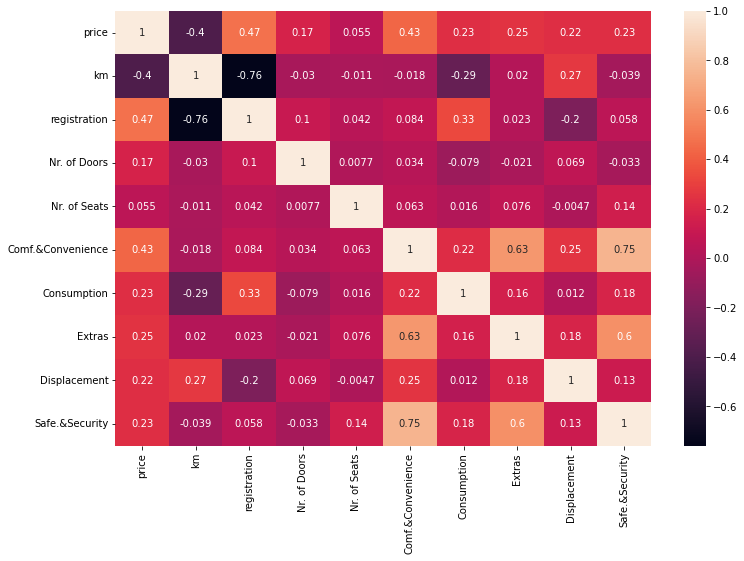

In [287]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)

In [728]:
df2 = pd.get_dummies(X11, drop_first = True,)

In [729]:
X = df2.drop("price", axis=1)

In [730]:
y = df2["price"]
y = np.array(y)

In [731]:
from sklearn.model_selection import train_test_split

In [732]:
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.2, random_state=1, shuffle=True) 

In [733]:
X_train.iloc[4325].to_dict()

{'km': 6800.0,
 'registration': 2019.0,
 'Nr. of Doors': 5.0,
 'Nr. of Seats': 5.0,
 'Consumption': 7.9,
 'Extras': 1.0,
 'Displacement': 1490.0,
 'Safe.&Security': 1.0,
 'make_model_Audi A2': 0.0,
 'make_model_Audi A3': 0.0,
 'make_model_Opel Astra': 0.0,
 'make_model_Opel Corsa': 0.0,
 'make_model_Opel Insignia': 1.0,
 'make_model_Renault Clio': 0.0,
 'make_model_Renault Duster': 0.0,
 'make_model_Renault Espace': 0.0,
 'body_type_Convertible': 0.0,
 'body_type_Coupe': 0.0,
 'body_type_Off-Road': 0.0,
 'body_type_Other': 0.0,
 'body_type_Sedans': 1.0,
 'body_type_Station wagon': 0.0,
 'body_type_Transporter': 0.0,
 'body_type_Van': 0.0,
 'hp_1': 0.0,
 'hp_100': 0.0,
 'hp_101': 0.0,
 'hp_103': 0.0,
 'hp_104': 0.0,
 'hp_110': 0.0,
 'hp_112': 0.0,
 'hp_115': 0.0,
 'hp_117': 0.0,
 'hp_118': 0.0,
 'hp_119': 0.0,
 'hp_120': 0.0,
 'hp_121': 0.0,
 'hp_122': 0.0,
 'hp_123': 0.0,
 'hp_125': 1.0,
 'hp_127': 0.0,
 'hp_132': 0.0,
 'hp_133': 0.0,
 'hp_135': 0.0,
 'hp_137': 0.0,
 'hp_140': 0.0,
 'h

In [734]:
X11

,price,make_model,body_type,km,registration,hp,Type,Gearing Type,Body Color,Nr. of Doors,Nr. of Seats,Consumption,Extras,Upholstery,Displacement,Safe.&Security
0,15770,Audi A1,Sedans,56013.0,2016.0,66,Diesel,Automatic,Black,5.0,5.0,4.3,3,"Cloth, Black",1422.0,14
1,14500,Audi A1,Sedans,80000.0,2017.0,141,Gasoline,Automatic,Red,3.0,5.0,7.1,4,"Cloth, Grey",1798.0,15
2,14640,Audi A1,Sedans,83450.0,2016.0,85,Diesel,Automatic,Black,4.0,5.0,4.4,2,"Cloth, Black",1598.0,12
3,14500,Audi A1,Sedans,73000.0,2016.0,66,Diesel,Automatic,Brown,3.0,5.0,4.3,3,"Cloth, Black",1422.0,14
4,15090,Audi A1,Sedans,63668.0,2016.0,85,Diesel,Automatic,White,4.0,5.0,4.3,4,"Part leather, Black",1598.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,39950,Renault Espace,Van,0.0,2019.0,147,Diesel,Automatic,Grey,5.0,5.0,6.2,2,"Full leather, Brown",1997.0,19
15756,39885,Renault Espace,Van,9900.0,2019.0,165,Gasoline,Automatic,Grey,5.0,5.0,9.2,3,Cloth,1798.0,19
15757,39875,Renault Espace,Van,15.0,2019.0,146,Diesel,Automatic,White,5.0,5.0,6.2,1,"Full leather, Black",1997.0,18
15758,39700,Renault Espace,Van,10.0,2019.0,147,Diesel,Automatic,Grey,5.0,5.0,6.2,2,Part leather,1997.0,12


# LinearRegression()

In [735]:
from sklearn import linear_model
model_lin = linear_model.LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

In [736]:
model_lin.score(X_test, y_test)

0.8758269161550174

# KNeighborsRegressor

In [280]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=7, weights="distance", p=1, leaf_size=20, n_jobs=-1)

In [281]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=20, n_jobs=-1, n_neighbors=7, p=1,
                    weights='distance')

In [282]:
knn_model.score(X_test, y_test)

0.6910019774737414

# RandomForestRegressor

In [558]:
from sklearn.ensemble import RandomForestRegressor
  
regressor_1 = RandomForestRegressor(n_estimators = 150, random_state = 0, n_jobs=-1)
  
regressor_1.fit(X_train, y_train)  

RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=0)

In [559]:
X_train.shape

(12608, 174)

In [560]:
X_test.shape

(3152, 174)

In [512]:
regressor_1.score(X_test, y_test)

0.9464179697115139

In [513]:
regressor_1.score(X_train, y_train)

0.9932117311266792

In [722]:
y_pred=regressor_1.predict(X_test)

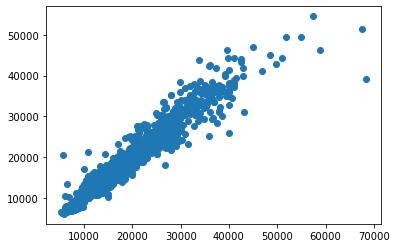

In [515]:
plt.scatter(y_test,y_pred)

In [297]:
pred=pd.DataFrame({"y_test":y_test,"y_train":y_pred})

In [298]:
pred

,y_test,y_train
0,19450,20307.173333
1,16790,16946.200000
2,33235,33854.453333
3,17500,15190.366667
4,9595,9004.226667
...,...,...
3147,19000,19005.413333
3148,10525,11238.173333
3149,17530,16261.580000
3150,18999,17057.360000


(2096.5, 71473.5, 3544.202, 72921.202)

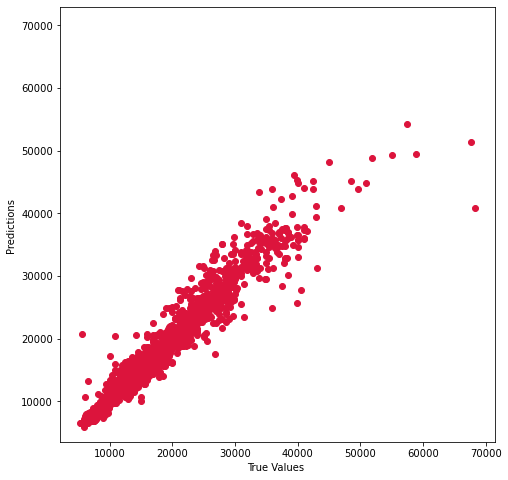

In [289]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred,c='crimson')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
 #plt.xlim([0, plt.xlim()])
# plt.ylim([0, plt.ylim()])
# _ = plt.plot([-100, 100], [-100, 100])

In [290]:
X_test

,km,registration,Nr. of Doors,Nr. of Seats,Consumption,Extras,Displacement,Safe.&Security,make_model_Audi A2,make_model_Audi A3,...,"Upholstery_Part leather, Red","Upholstery_Part leather, White",Upholstery_Velour,"Upholstery_Velour, Black","Upholstery_Velour, Grey",Upholstery_White,Upholstery_alcantara,"Upholstery_alcantara, Black","Upholstery_alcantara, Grey","Upholstery_alcantara, Other"
12162,29798.0,2018.0,4.0,5.0,7.3,6,1490.0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
6624,25000.0,2018.0,4.0,5.0,7.2,3,1399.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
12448,0.0,2019.0,4.0,5.0,7.6,3,1490.0,21,0,0,...,0,0,0,0,0,0,0,0,0,0
10447,52100.0,2016.0,5.0,5.0,6.5,1,1598.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
9527,24500.0,2018.0,5.0,5.0,6.7,1,1229.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,54000.0,2017.0,5.0,5.0,4.7,5,1598.0,13,0,1,...,0,0,0,0,0,0,0,0,0,0
6039,81000.0,2017.0,5.0,4.0,4.6,1,1696.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
278,45200.0,2016.0,2.0,5.0,6.2,2,1395.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
4089,95000.0,2017.0,5.0,5.0,4.7,2,1598.0,19,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

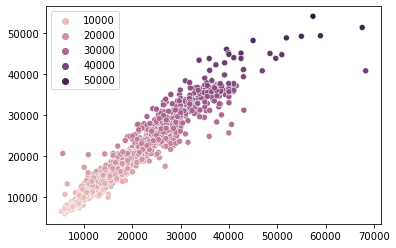

In [291]:
sns.scatterplot(x=y_test,y=y_pred,hue=y_pred)

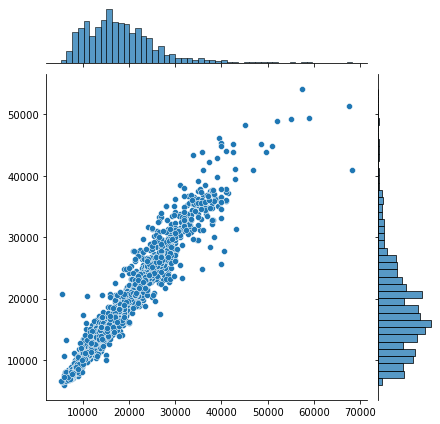

In [292]:
sns.jointplot(x=y_test,y=y_pred);

In [739]:
XGBRegressor()

NameError: name 'XGBRegressor' is not defined

In [744]:
    # Import the XGBoostRegressorn

from sklearn.metrics import roc_auc_score, r2_score
#from sklearn import metrics
import xgboost as xgb

# Create xgboost classifer object

xgb = xgb.XGBRegressor(verbosity=0)

# Train XGBoost Classifer
model_xgb= xgb.fit(X_train, y_train)


#Predict the response for test dataset

y_pred_train = model_xgb.predict(X_train)
y_pred_x= model_xgb.predict(X_test)


# TESTS  RESULTS

print('XGBoost ile Train R2: {0:0.2f}'.format(metrics.r2_score(y_train, y_pred_train)))
print('XGBoost ile Test R2: {0:0.2f}'.format(metrics.r2_score(y_test, y_pred_x)))

XGBoost ile Train R2: 0.98
XGBoost ile Test R2: 0.94


In [745]:
y_pred_x=pd.Series(y_pred_x)
y_pred_x=list(y_pred_x)
y_pred_x

[19679.21484375,
 17389.130859375,
 29524.28515625,
 15006.1533203125,
 9327.6376953125,
 30981.693359375,
 18409.482421875,
 7035.060546875,
 25821.92578125,
 18435.978515625,
 26110.005859375,
 17998.11328125,
 22224.216796875,
 7556.4091796875,
 13317.1640625,
 16843.16796875,
 8235.41015625,
 20684.998046875,
 22568.125,
 16254.5302734375,
 20180.349609375,
 16844.47265625,
 8763.7392578125,
 14610.2021484375,
 12949.9169921875,
 20013.44921875,
 12029.5419921875,
 15530.9619140625,
 22827.458984375,
 24459.12890625,
 13009.0986328125,
 24257.59765625,
 15106.9326171875,
 26201.53125,
 18681.126953125,
 22681.736328125,
 22248.216796875,
 17601.943359375,
 7403.0595703125,
 18490.376953125,
 15220.404296875,
 22215.6953125,
 21360.90234375,
 21252.126953125,
 13592.9033203125,
 15216.03515625,
 13347.6103515625,
 26459.48046875,
 15551.955078125,
 10624.2080078125,
 19308.974609375,
 10873.470703125,
 14665.7197265625,
 20930.51171875,
 43916.99609375,
 11095.0537109375,
 7590.5068

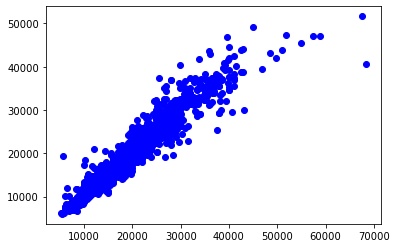

In [746]:
plt.scatter(y_test,y_pred_x, color='blue')

In [752]:
y_test1=np.array(y_test.copy())

In [753]:
error_df=pd.DataFrame(y_test)
error_df['y_predd']=y_pred_x.copy()

In [757]:
error_df['abs_error']=abs(error_df['price']-error_df['y_predd'])

KeyError: 'price'

# metrics

In [299]:
from sklearn import metrics

In [300]:
metrics.mean_absolute_error(y_test, y_pred)

941.1560967966207

In [317]:
mae_test = mean_absolute_error(y_test, y_pred)
mae_test

941.1560967966207

In [318]:
mse_test = mean_squared_error(y_test, y_pred)
mse_test

2816001.5826459415

In [319]:
r2_test = r2_score(y_test, y_pred)
r2_test

0.9454381544484647

# WAPE_test

In [323]:
def wape(actual,pred):
    return (np.abs((actual - pred)).sum() / actual.sum()) * 100

In [324]:
(np.abs((y_test-y_pred)).sum() / y_pred.sum()) * 100

5.254598020331263

# MAPE_test

In [326]:
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [327]:
MAPE_test = mape(y_test, y_pred)
MAPE_test 

5.189325981546119

In [328]:
X_train.shape

(12608, 174)

In [329]:
X_test.shape

(3152, 174)

# KFold

In [330]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_validate

Scoring_type = {'R2': metrics.make_scorer(lambda x, y: 100*metrics.r2_score(x,y)),'MAPE': metrics.make_scorer(lambda x,y: 100*metrics.mean_absolute_percentage_error(x,y)), 'WAPE': metrics.make_scorer(wape) ,"MSE": metrics.make_scorer(lambda x,y: metrics.mean_squared_error(x,y))}
cv = KFold(n_splits=10)
cv_results = cross_validate(regressor_1, X_train, y_train, n_jobs=-1, return_train_score=True, cv=cv, scoring=Scoring_type)

In [331]:
Scoring_type

{'R2': make_scorer(<lambda>),
 'MAPE': make_scorer(<lambda>),
 'WAPE': make_scorer(wape),
 'MSE': make_scorer(<lambda>)}

In [332]:
cv

KFold(n_splits=10, random_state=None, shuffle=False)

In [333]:
cv_results

{'fit_time': array([23.72565675, 23.87391472, 23.67878675, 23.85064292, 23.96054816,
        23.88242435, 24.17690611, 23.85064292,  6.30754018,  6.20304132]),
 'score_time': array([0.21926761, 0.1903944 , 0.2661376 , 0.09428144, 0.15964293,
        0.13643289, 0.34435749, 0.09428144, 0.05539608, 0.05357409]),
 'test_R2': array([94.15177926, 95.17509085, 95.47592914, 96.27021078, 94.86632148,
        95.6522978 , 95.18536289, 94.34092757, 95.84109608, 95.10696821]),
 'train_R2': array([99.28606838, 99.29053111, 99.29878154, 99.29980115, 99.32387905,
        99.30273826, 99.29436834, 99.30552105, 99.30865141, 99.27368267]),
 'test_MAPE': array([ 9.90968214,  6.47902803,  5.02641325,  4.65530452, 63.72569347,
         5.23391003,  5.41755075,  5.1411465 ,  4.83351848, 12.18910359]),
 'train_MAPE': array([4.59114988, 4.70525556, 4.77804227, 4.75058745, 2.47068097,
        5.25341661, 5.21198815, 5.25321775, 5.35142036, 5.00730301]),
 'test_WAPE': array([5.61413119, 5.10181552, 5.01024956,

In [334]:
df6 = pd.DataFrame(cv_results)
df6

,fit_time,score_time,test_R2,train_R2,test_MAPE,train_MAPE,test_WAPE,train_WAPE,test_MSE,train_MSE
0,23.725657,0.219268,94.151779,99.286068,9.909682,4.591150,5.614131,1.961778,3.184492e+06,395614.965633
1,23.873915,0.190394,95.175091,99.290531,6.479028,4.705256,5.101816,1.982174,2.681364e+06,392213.074345
2,23.678787,0.266138,95.475929,99.298782,5.026413,4.778042,5.010250,1.976410,2.385667e+06,389917.202393
3,23.850643,0.094281,96.270211,99.299801,4.655305,4.750587,4.698051,1.979969,1.887674e+06,390884.601287
4,23.960548,0.159643,94.866321,99.323879,63.725693,2.470681,5.221902,1.968042,2.799729e+06,374525.198452
5,23.882424,0.136433,95.652298,99.302738,5.233910,5.253417,5.253484,1.972547,2.398969e+06,385797.140717
6,24.176906,0.344357,95.185363,99.294368,5.417551,5.211988,5.498153,1.953908,2.797688e+06,388164.102453
7,23.850643,0.094281,94.340928,99.305521,5.141146,5.253218,5.283492,1.966199,2.860090e+06,387848.170026
8,6.307540,0.055396,95.841096,99.308651,4.833518,5.351420,4.961457,1.978113,2.304021e+06,382386.711768
9,6.203041,0.053574,95.106968,99.273683,12.189104,5.007303,5.216947,1.981028,3.210454e+06,393451.351423


In [426]:
df7 = df6
df7.columns = ["FIT TIME", "SCORE TIME", "R2 (TEST)", "R2 (TRAIN)", "MAPE (TEST)","MAPE (TRAIN)","WAPE (TEST)","WAPE (TRAIN)" ,"MSE (TEST)","MSE (TRAIN)"]
df7

,FIT TIME,SCORE TIME,R2 (TEST),R2 (TRAIN),MAPE (TEST),MAPE (TRAIN),WAPE (TEST),WAPE (TRAIN),MSE (TEST),MSE (TRAIN)
0,23.725657,0.219268,94.151779,99.286068,9.909682,4.591150,5.614131,1.961778,3.184492e+06,395614.965633
1,23.873915,0.190394,95.175091,99.290531,6.479028,4.705256,5.101816,1.982174,2.681364e+06,392213.074345
2,23.678787,0.266138,95.475929,99.298782,5.026413,4.778042,5.010250,1.976410,2.385667e+06,389917.202393
3,23.850643,0.094281,96.270211,99.299801,4.655305,4.750587,4.698051,1.979969,1.887674e+06,390884.601287
4,23.960548,0.159643,94.866321,99.323879,63.725693,2.470681,5.221902,1.968042,2.799729e+06,374525.198452
5,23.882424,0.136433,95.652298,99.302738,5.233910,5.253417,5.253484,1.972547,2.398969e+06,385797.140717
6,24.176906,0.344357,95.185363,99.294368,5.417551,5.211988,5.498153,1.953908,2.797688e+06,388164.102453
7,23.850643,0.094281,94.340928,99.305521,5.141146,5.253218,5.283492,1.966199,2.860090e+06,387848.170026
8,6.307540,0.055396,95.841096,99.308651,4.833518,5.351420,4.961457,1.978113,2.304021e+06,382386.711768
9,6.203041,0.053574,95.106968,99.273683,12.189104,5.007303,5.216947,1.981028,3.210454e+06,393451.351423


Yukarıda görüleceği üzere 4. katta (fold 4) MAPE değeri çok yüksek. Bunun sebebini anlamak için aşağıda bazı işlemler yaptım.

X_train'i incelersek train test split işlemi yaparken indeksin karıştığını görürüz. O nedenle yeni indeks atayalım ama eski indeksi de koruyalım lazım olabilir. Yeni indeks ile verilerin hangi indekste yoğun dağıldığını görebiliriz.

In [565]:
X_train1 = X_train.copy()
ex_index = X_train.index
X_train1.insert(0, "ex_index", X_train.index)

In [566]:
new_index = [i for i in range(0,12608)]
X_train1.insert(0, "new_index", new_index)
X_train1.set_index("new_index", inplace=True)
X_train1.head()

,ex_index,km,registration,Nr. of Doors,Nr. of Seats,Consumption,Extras,Displacement,Safe.&Security,make_model_Audi A2,...,"Upholstery_Part leather, Red","Upholstery_Part leather, White",Upholstery_Velour,"Upholstery_Velour, Black","Upholstery_Velour, Grey",Upholstery_White,Upholstery_alcantara,"Upholstery_alcantara, Black","Upholstery_alcantara, Grey","Upholstery_alcantara, Other"
new_index,,,,,,,,,,,,,,,,,,,,,
0,4325,50129.0,2017.0,5.0,5.0,4.3,1,1598.0,13,0,...,0,0,0,0,0,0,0,0,0,0
1,5633,51.0,2019.0,5.0,5.0,5.0,3,1598.0,13,0,...,0,0,0,0,0,0,0,0,0,0
2,1198,10072.0,2018.0,5.0,5.0,5.0,2,999.0,12,0,...,0,0,0,0,0,0,0,0,0,0
3,9918,10.0,2019.0,5.0,5.0,7.8,2,1398.0,13,0,...,0,0,0,0,0,0,0,0,0,0
4,537,45258.0,2016.0,5.0,5.0,5.0,3,999.0,12,0,...,0,0,0,0,0,0,0,0,0,0


In [567]:
X_train1.columns[9:17]

Index(['make_model_Audi A2', 'make_model_Audi A3', 'make_model_Opel Astra',
       'make_model_Opel Corsa', 'make_model_Opel Insignia',
       'make_model_Renault Clio', 'make_model_Renault Duster',
       'make_model_Renault Espace'],
      dtype='object')

In [568]:
X_train_in_the_4th_fold = X_train1.drop(index=range(5044,6303))
X_train_in_the_4th_fold2 = X_train_in_the_4th_fold.copy()  
X_train_in_the_4th_fold3 = X_train_in_the_4th_fold2.loc[:, X_train_in_the_4th_fold2.columns[9:17]]

Yukarıda Audi A1 sütununu ve sayısını göremiyoruz, ama şunu biliyoruz, yukarıdaki model sütunlarının hepsinin 0 olduğu satırlardaki veriler Audi A1 verileridir. Biz 1 olanları bulup toplam satır sayısından çıkarırsak sıfır olanları yani Audi A1 sayısını bulmuş oluruz

In [569]:
11349 - (X_train_in_the_4th_fold3 == 1).sum().sum()

1827

Aşağıdaki işlemler sonucunda verilerin dağılımını görebiliriz

In [570]:
ones = np.ones((1827,), dtype=int)
zeros = np.zeros((9522,), dtype=int)
ones_zeros = np.concatenate((ones, zeros), axis=0)
Audi_A1 = ones_zeros

In [571]:
X_train_in_the_4th_fold3.insert(0, "Audi A1", Audi_A1)

In [572]:
fold_4_descriptive_info = pd.DataFrame(X_train_in_the_4th_fold3.describe())
fold_4_descriptive_info.columns = [["Audi A1",'Audi A2', 'Audi A3', 'Opel Astra','Opel Corsa', 'Opel Insignia','Renault Clio',
                                   'Renault Duster', 'Renault Espace']]
fold_4_descriptive_info

,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
count,11349.000000,11349.000000,11349.000000,11349.000000,11349.000000,11349.000000,11349.000000,11349.000000,11349.000000
mean,0.160983,0.000088,0.193762,0.160543,0.141686,0.163274,0.114195,0.002027,0.063442
std,0.367532,0.009387,0.395262,0.367125,0.348744,0.369632,0.318062,0.044974,0.243766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Yukarıda da görüleceği üzere, mean ve count verilerine bakarak 4. katta train olarak kullanılan verideki araba markalarının dağılımını görebiliriz.

## Arabaların dağılımını görmek için aşağıda 10 hücre sonra çizdiğim grafikleri kullanabiliriz. Buradan görüleceği üzere arabalar uniform dağılmış diyebiliriz.

In [573]:
arabalar2 = df1["make_model"].unique()

In [574]:
X_train1.columns[8:17]

Index(['Safe.&Security', 'make_model_Audi A2', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace'],
      dtype='object')

In [582]:
X_train1.insert(9, "make_model_Audi A1", np.ones(12608 ,dtype=int))

In [553]:
del X_train1['Safe.&Security']

In [555]:
X_train1['Safe.&Security']=X_train['Safe.&Security']

In [584]:
X_train1.columns[9:18]

Index(['make_model_Audi A1', 'make_model_Audi A2', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace'],
      dtype='object')

In [585]:
arabalar = X_train1.columns[9:18]
len(arabalar)

9

In [586]:
X_train1.shape

(12608, 176)

In [591]:
X_train1.shape

(12608, 176)

In [587]:
X_test.shape

(3152, 174)

In [590]:
X_train1.columns.nunique()

176

In [592]:
listemm = []
for i in arabalar:
    index_araba = X_train1[(X_train1[i] == 1)].index
    listemm.append(index_araba)

In [593]:
the_list = list(listemm[0]) + list(listemm[1])+ list(listemm[2]) + list(listemm[3]) +list(listemm[4]) + list(listemm[5]) + list(listemm[6])+list(listemm[7])

In [594]:
len(the_list)

22364

In [595]:
X_train1.loc[the_list, 'make_model_Audi A1'] = 0

In [596]:
X_train1["make_model_Audi A1"].sum()

0

<Figure size 864x576 with 0 Axes>

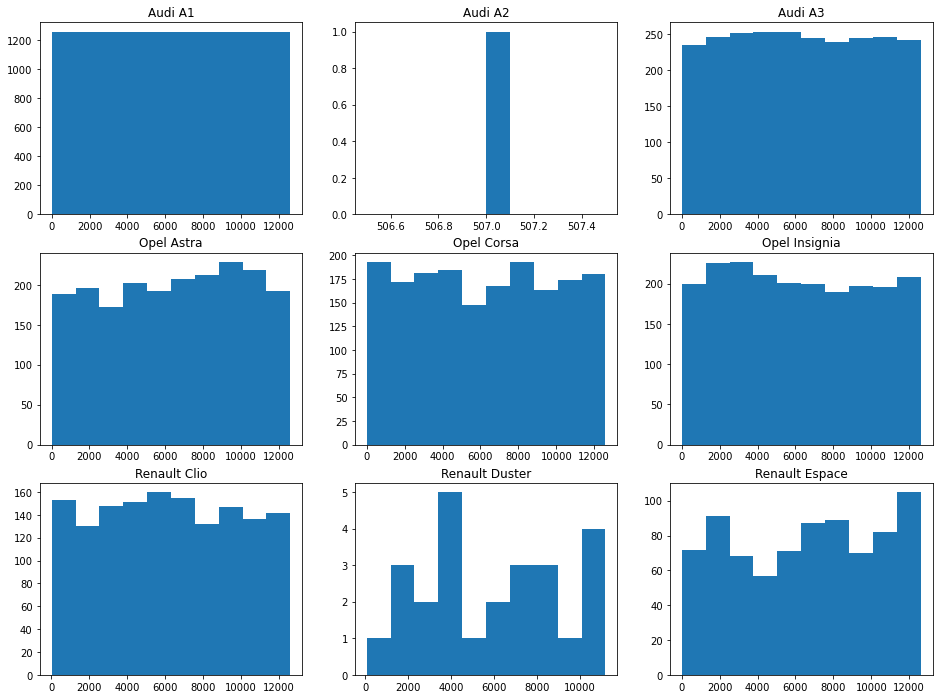

In [597]:
plt.figure(figsize=(12,8))
fig, axs = plt.subplots(3, 3,figsize=(16,12))
k=0
for i in range(3):
    axs[0, i].hist(listemm[k])
    axs[0, i].set_title(arabalar2[k])
    k+=1
for i in range(3):
    axs[1, i].hist(listemm[k])
    axs[1, i].set_title(arabalar2[k])
    k+=1 
for i in range(3):
    axs[2, i].hist(listemm[k])
    axs[2, i].set_title(arabalar2[k])
    k+=1 
plt.show()

# "regressor_1"
## isimli modelimizi joblib ile kaydedelim, bu sayede tekrar çağırıp kullanabilelim.

In [598]:
joblib.dump(regressor_1, "regressor_1")

['regressor_1']

## Modelimiz joblib'den çağrılabiliyor mu bakalım.

In [599]:
modellll = joblib.load("regressor_1")

In [600]:
modellll

RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=0)

In [601]:
modellll.predict(X_train)

array([17203.72666667, 24642.03111111, 15851.86      , ...,
       19400.        , 16334.35333333,  8441.98      ])

Modelimize kullanıcının bir veri girip sonuç aldığını görebilmek için elimizdeki dataframe'den bir veri ürettik ve aşağıda bu veriyi kaydettik.

In [602]:
X_train

,km,registration,Nr. of Doors,Nr. of Seats,Consumption,Extras,Displacement,Safe.&Security,make_model_Audi A2,make_model_Audi A3,...,"Upholstery_Part leather, Red","Upholstery_Part leather, White",Upholstery_Velour,"Upholstery_Velour, Black","Upholstery_Velour, Grey",Upholstery_White,Upholstery_alcantara,"Upholstery_alcantara, Black","Upholstery_alcantara, Grey","Upholstery_alcantara, Other"
4325,50129.0,2017.0,5.0,5.0,4.3,1,1598.0,13,0,1,...,0,0,0,0,0,0,0,0,0,0
5633,51.0,2019.0,5.0,5.0,5.0,3,1598.0,13,0,1,...,0,0,0,0,0,0,0,0,0,0
1198,10072.0,2018.0,5.0,5.0,5.0,2,999.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
9918,10.0,2019.0,5.0,5.0,7.8,2,1398.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
537,45258.0,2016.0,5.0,5.0,5.0,3,999.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,25900.0,2017.0,4.0,5.0,5.8,2,1395.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,10.0,2019.0,5.0,5.0,5.8,1,999.0,9,0,1,...,0,0,0,0,0,0,0,0,0,0
12172,3095.0,2018.0,5.0,5.0,7.5,1,1490.0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
235,18392.0,2016.0,5.0,5.0,5.4,3,999.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [609]:
listttt = [i for i in range(0,7000)]
df55 = df.iloc[listttt]
df55 = df55.drop("price", axis=1)
df55.head()

,url,make_model,short_description,body_type,vat,km,registration,prev_owner,kW,hp,...,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,...,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,...,[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,...,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,...,"[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sedans,None,"63,668 km",02/2016,1 previous owner,NaN,85 kW,...,[\nSichern Sie sich diesen Audi A1 1.6 TDI Spo...,[\n4 (Green)\n],NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN


In [612]:
df55.to_json(r'C:\Users\gmzyn\++++++CALISMALAR\scout_car_saved\yenice1.json')

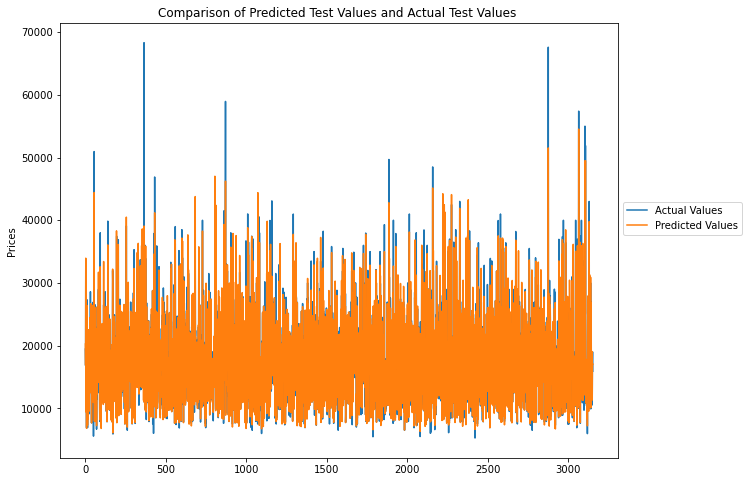

In [615]:
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.legend(bbox_to_anchor=(1,0.6))
plt.title("Comparison of Predicted Test Values and Actual Test Values ")
plt.ylabel('Prices')
plt.show()

In [616]:
y_test.shape

(3152,)

In [617]:
y_list = [i for i in range(3152)]

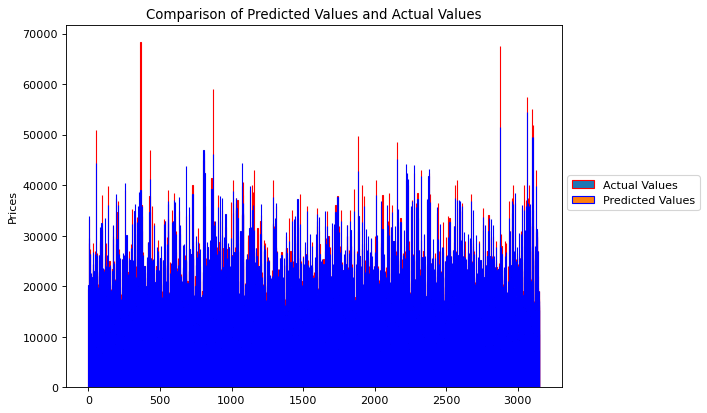

In [618]:
plt.figure(figsize=(8,6), dpi= 80)
plt.bar(y_list, y_test, edgecolor="red",label="Actual Values")
plt.bar(y_list, y_pred, edgecolor="blue", label="Predicted Values")
plt.legend(bbox_to_anchor=(1,0.6))
plt.title("Comparison of Predicted Values and Actual Values")
plt.ylabel('Prices')
plt.show()

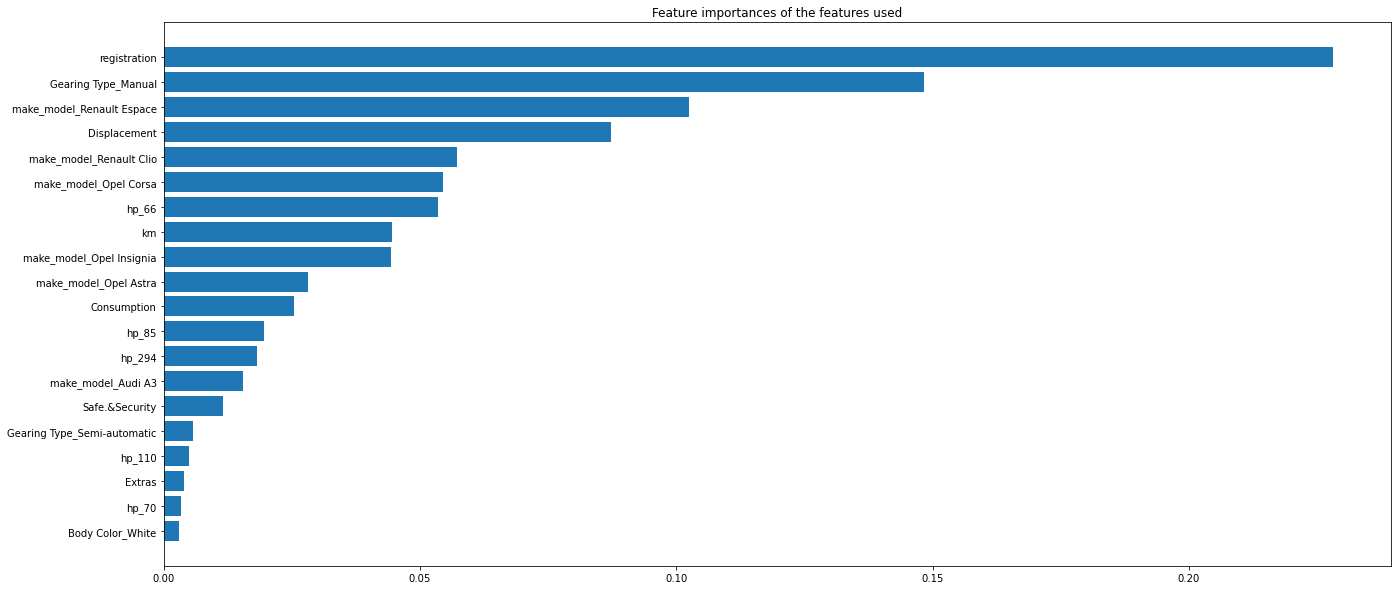

In [619]:
#Seeing feature importances
feature_importances = regressor_1.feature_importances_
feature_list = list(X)

relative_importance = pd.DataFrame(index=feature_list, data=feature_importances, columns = ["importance"])

importances1 = relative_importance.sort_values(by="importance", ascending=True).tail(20)
importance_index = importances1.index.to_list()

importances2 = importances1["importance"]
importances3 = list(importances2.values)

plt.figure(figsize=(22,10))
importances1 = relative_importance.sort_values(by="importance", ascending=True).tail(20)
plt.barh(importance_index,importances3) 
plt.title("Feature importances of the features used")
plt.show()

YUKARDA DA GÖRÜLECEĞİ VE BEKLENİLDİĞİ GİBİ GENEL OLARAK ! ARAÇLARIN FİYATLARININ BELİRLENMESİNDE EN FAZLA ARACIN SON MODEL YANİ 2019 OLMASI SONRA YÜKSEK BEYGİR GÜCÜ
ARDINDAN MARKA MODELİNİN NE OLDUĞU SONRA DA GRAFİKTEKİ DİĞER DEĞİŞKENLERE GÖRE KATSAYILARININ ÖNEMİ
ANLAŞILMAKTADIR !!!

In [621]:
error_y_test = y_pred - y_test
error_y_test.shape

(3152,)

In [622]:
error_y_test.max()

15045.286666666667

In [623]:
for i in range(3152):
    if error_y_test[i] == 14979.7:
        print(i)

In [624]:
y_test[50]

5555

In [625]:
df1[df1["price"] == 5555]

,price,make_model,body_type,km,registration,hp,Type,Gearing Type,Body Color,Nr. of Doors,Nr. of Seats,Comf.&Convenience,Consumption,Extras,Upholstery,Displacement,Safe.&Security
3203,5555,Audi A3,Station wagon,5558.0,2018.0,110,Diesel,Manual,Orange,5.0,5.0,7.0,5.7,2,"Cloth, Black",1968.0,15


In [626]:
error_y_test.min()

-29243.54666666667

In [627]:
for i in range(3152):
    if error_y_test[i] == -26921.059999999998:
        print(i)

In [628]:
y_test[364]

68320

In [629]:
df1[df1["price"] == 68320]

,price,make_model,body_type,km,registration,hp,Type,Gearing Type,Body Color,Nr. of Doors,Nr. of Seats,Comf.&Convenience,Consumption,Extras,Upholstery,Displacement,Safe.&Security
15667,68320,Renault Espace,Van,4307.0,2019.0,118,Diesel,Automatic,Black,5.0,5.0,31.0,9.2,2,"Full leather, Brown",1598.0,24


In [630]:
df1["make_model"].unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

X i yukarıda şöyle tanımlamıştık, lazım oluyor diye buraya da yazdım >>> "X = df2.drop("price", axis=1)"

In [679]:
X = df2.drop("price", axis=1)

In [680]:
X_Audi1 = X.copy()

In [681]:
for i in range(6,15,1):
    X_Audi1.drop((X_Audi1[X_Audi1[X_Audi1.columns[i:i+1]].values == 1].index), inplace=True)

In [682]:
X_Audi1.head(3)

,km,registration,Nr. of Doors,Nr. of Seats,Consumption,Extras,Displacement,Safe.&Security,make_model_Audi A2,make_model_Audi A3,...,"Upholstery_Part leather, Red","Upholstery_Part leather, White",Upholstery_Velour,"Upholstery_Velour, Black","Upholstery_Velour, Grey",Upholstery_White,Upholstery_alcantara,"Upholstery_alcantara, Black","Upholstery_alcantara, Grey","Upholstery_alcantara, Other"
0,56013.0,2016.0,5.0,5.0,4.3,3,1422.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80000.0,2017.0,3.0,5.0,7.1,4,1798.0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
2,83450.0,2016.0,4.0,5.0,4.4,2,1598.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [683]:
dfAudi1 = df1[df1["make_model"] == 'Audi A1' ]

In [713]:
dfAudi1.columns

Index(['price', 'make_model', 'body_type', 'km', 'registration', 'hp', 'Type',
       'Gearing Type', 'Body Color', 'Nr. of Doors', 'Nr. of Seats',
       'Comf.&Convenience', 'Consumption', 'Extras', 'Upholstery',
       'Displacement', 'Safe.&Security'],
      dtype='object')

In [685]:
df1_make_model_column_uniques = list(df1["make_model"].unique())
df1_make_model_column_uniques

['Audi A1',
 'Audi A2',
 'Audi A3',
 'Opel Astra',
 'Opel Corsa',
 'Opel Insignia',
 'Renault Clio',
 'Renault Duster',
 'Renault Espace']

In [717]:
dfAudi11 =dfAudi1.drop("price",axis=1)
dfAudi11.columns

Index(['make_model', 'body_type', 'km', 'registration', 'hp', 'Type',
       'Gearing Type', 'Body Color', 'Nr. of Doors', 'Nr. of Seats',
       'Comf.&Convenience', 'Consumption', 'Extras', 'Upholstery',
       'Displacement', 'Safe.&Security'],
      dtype='object')

In [718]:
dfAudi11.columns

Index(['make_model', 'body_type', 'km', 'registration', 'hp', 'Type',
       'Gearing Type', 'Body Color', 'Nr. of Doors', 'Nr. of Seats',
       'Comf.&Convenience', 'Consumption', 'Extras', 'Upholstery',
       'Displacement', 'Safe.&Security'],
      dtype='object')

In [ ]:
X_Audi1

In [703]:
regressor_1.predict(X_Audi1,y)

array([15599.82666667, 14987.04666667, 14616.74      , ...,
       38739.22222222, 41165.94      , 43144.05111111])

In [706]:
regressor_1.predict

<bound method ForestRegressor.predict of RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=0)>

In [705]:
X_Audi1

,km,registration,Nr. of Doors,Nr. of Seats,Consumption,Extras,Displacement,Safe.&Security,make_model_Audi A2,make_model_Audi A3,...,"Upholstery_Part leather, Red","Upholstery_Part leather, White",Upholstery_Velour,"Upholstery_Velour, Black","Upholstery_Velour, Grey",Upholstery_White,Upholstery_alcantara,"Upholstery_alcantara, Black","Upholstery_alcantara, Grey","Upholstery_alcantara, Other"
0,56013.0,2016.0,5.0,5.0,4.3,3,1422.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80000.0,2017.0,3.0,5.0,7.1,4,1798.0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
2,83450.0,2016.0,4.0,5.0,4.4,2,1598.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,73000.0,2016.0,3.0,5.0,4.3,3,1422.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63668.0,2016.0,4.0,5.0,4.3,4,1598.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,0.0,2019.0,5.0,5.0,6.2,2,1997.0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
15756,9900.0,2019.0,5.0,5.0,9.2,3,1798.0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
15757,15.0,2019.0,5.0,5.0,6.2,1,1997.0,18,0,0,...,0,0,0,0,0,0,0,0,0,0
15758,10.0,2019.0,5.0,5.0,6.2,2,1997.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [687]:
y_audi1_pred = regressor_1.predict(X_Audi1)
len(y_audi1_pred)

3370

In [704]:
y_audi1 = df1[df1["make_model"] == "Audi A1"]["price"]
len(y_audi1)

2588

In [689]:
make_model_data_list = []

for i in range(6,14):
    make_model_data = X[X[X.columns[i:i+1]].values == 1]
    make_model_data_list.append(make_model_data)

In [690]:
make_model_data_list[0]

,km,registration,Nr. of Doors,Nr. of Seats,Consumption,Extras,Displacement,Safe.&Security,make_model_Audi A2,make_model_Audi A3,...,"Upholstery_Part leather, Red","Upholstery_Part leather, White",Upholstery_Velour,"Upholstery_Velour, Black","Upholstery_Velour, Grey",Upholstery_White,Upholstery_alcantara,"Upholstery_alcantara, Black","Upholstery_alcantara, Grey","Upholstery_alcantara, Other"
12334,0.0,2019.0,5.0,5.0,8.2,2,1.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
12340,0.0,2019.0,5.0,5.0,9.4,4,1.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
12351,10.0,2019.0,5.0,5.0,8.2,1,1.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
12366,0.0,2019.0,5.0,5.0,5.0,2,1.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
12368,70.0,2019.0,5.0,5.0,8.2,1,1.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
12420,1574.0,2019.0,5.0,5.0,7.2,4,1.0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
12470,2254.0,2019.0,5.0,5.0,6.6,2,1.0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
12536,0.0,2019.0,5.0,5.0,10.0,2,1.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
12615,10.0,2019.0,5.0,5.0,8.3,3,1.0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
12633,0.0,2019.0,5.0,5.0,8.3,2,1.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [691]:
make_model_df_list = []

for i in range(1,9):
    make_model_df = df1[df1["make_model"] == df1_make_model_column_uniques[i]]
    make_model_df_list.append(make_model_df)

In [692]:
make_model_df_list[0]

,price,make_model,body_type,km,registration,hp,Type,Gearing Type,Body Color,Nr. of Doors,Nr. of Seats,Comf.&Convenience,Consumption,Extras,Upholstery,Displacement,Safe.&Security
2588,28200,Audi A2,Off-Road,26166.0,2018.0,85,Diesel,Manual,Grey,5.0,5.0,15.0,5.6,1,"Cloth, Black",1598.0,15


In [693]:
len(make_model_df_list)

8

In [694]:
df_list= []

for i in range(8):
    df_element = pd.get_dummies(make_model_data_list[i], drop_first = True)
    df_list.append(df_element)
len(df_list)

8

In [695]:
df_list[0]

,km,registration,Nr. of Doors,Nr. of Seats,Consumption,Extras,Displacement,Safe.&Security,make_model_Audi A2,make_model_Audi A3,...,"Upholstery_Part leather, Red","Upholstery_Part leather, White",Upholstery_Velour,"Upholstery_Velour, Black","Upholstery_Velour, Grey",Upholstery_White,Upholstery_alcantara,"Upholstery_alcantara, Black","Upholstery_alcantara, Grey","Upholstery_alcantara, Other"
12334,0.0,2019.0,5.0,5.0,8.2,2,1.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
12340,0.0,2019.0,5.0,5.0,9.4,4,1.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
12351,10.0,2019.0,5.0,5.0,8.2,1,1.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
12366,0.0,2019.0,5.0,5.0,5.0,2,1.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
12368,70.0,2019.0,5.0,5.0,8.2,1,1.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
12420,1574.0,2019.0,5.0,5.0,7.2,4,1.0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
12470,2254.0,2019.0,5.0,5.0,6.6,2,1.0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
12536,0.0,2019.0,5.0,5.0,10.0,2,1.0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
12615,10.0,2019.0,5.0,5.0,8.3,3,1.0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
12633,0.0,2019.0,5.0,5.0,8.3,2,1.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [696]:
y_real_prices=[]

for i in range(1,9):
    y_real_prices1 = df1[df1["make_model"] == df1_make_model_column_uniques[i]]["price"]
    y_real_prices.append(y_real_prices1)
len(y_real_prices)

8

In [697]:
y_pred_prices=[]

for i in range(8):
    y_pred_prices1 = regressor_1.predict(df_list[i])
    y_pred_prices.append(y_pred_prices1)
len(y_pred_prices)

8

In [698]:
y_audi1

0       15770
1       14500
2       14640
3       14500
4       15090
        ...  
2583    21800
2584    21789
2585    21750
2586    21760
2587    21750
Name: price, Length: 2588, dtype: int64

In [699]:
len(y_audi1_pred)

3370

In [725]:
y_audi1 = df1[df1["make_model"] == "Audi A1"]["price"]

In [760]:
# MAPE_Audi_A1 = mape(y_audi1, y_audi1_pred)
# MAPE_Audi_A1

# Tekli (Univariate) Analiz
Değişkenlere kendi içlerinde bakıp nasıl göründüğünü inceleyelim:

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


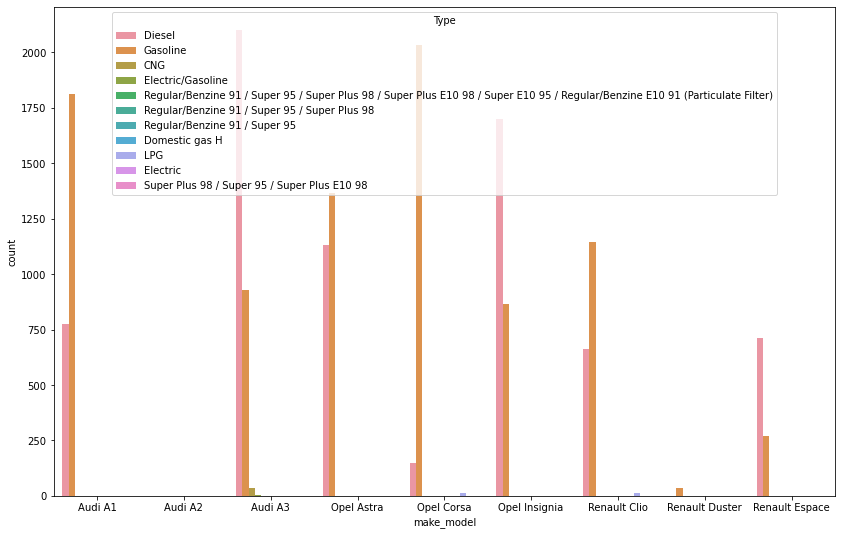

In [786]:
# symboling -> sigorta riski
fig = plt.figure(figsize=(14,9))
sns.countplot(df1.make_model, hue=df1.Type)
plt.show();

##  GÖRÜLCEĞİ ÜZRE BENZİNLİ ARAÇ KULLANIMI BENZER YOUNLUKTA!!

# İkili (Bivariate) Analiz
Şimdi değişkenlerin Fiyat'ı nasıl etkilediğini görmeye çalışalım:

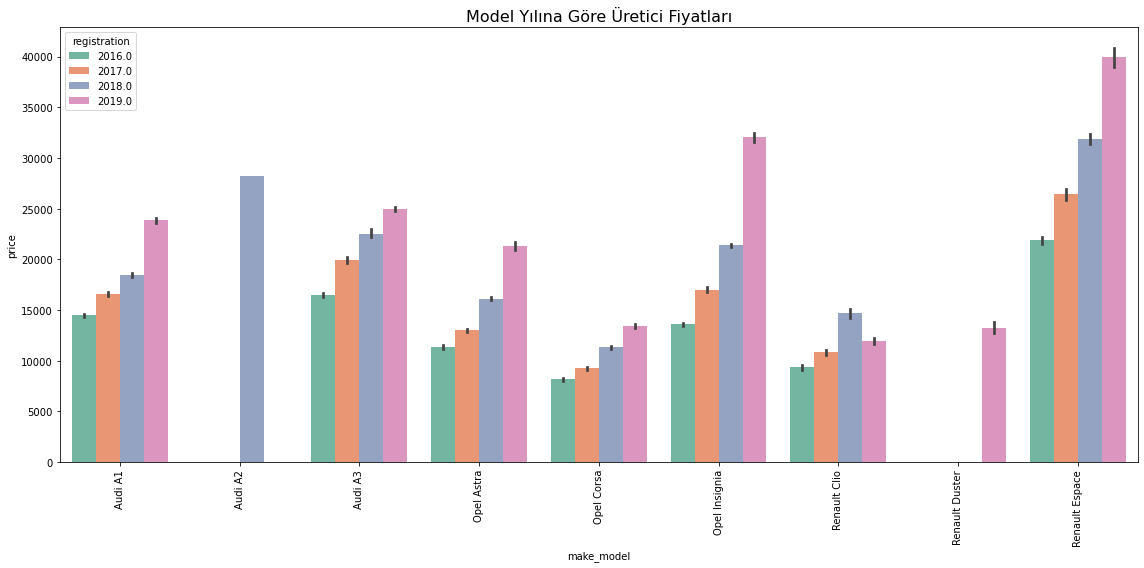

In [759]:
#Yıllara Göre Üretici bazlı ortalama fiyatlar

plt.figure(figsize=(16,8))
plt.title('Model Yılına Göre Üretici Fiyatları', fontsize=16)
sns.barplot(x=df1.make_model, y=df1.price, 
            hue=df1.registration, palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()

In [769]:
X_test_models=X_test.iloc[:,8:16].copy()
X_test_models

,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace
12162,0,0,0,0,1,0,0,0
6624,0,0,1,0,0,0,0,0
12448,0,0,0,0,1,0,0,0
10447,0,0,0,0,1,0,0,0
9527,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
4077,0,1,0,0,0,0,0,0
6039,0,0,1,0,0,0,0,0
278,0,0,0,0,0,0,0,0
4089,0,1,0,0,0,0,0,0


In [770]:
list_car1=X_test_models[X_test_models['make_model_Renault Espace']==1].index

In [771]:
list_car1

Int64Index([15487, 15079, 15662, 15365, 15281, 15389, 15552, 15242, 15165,
            14790,
            ...
            15441, 15574, 14893, 14984, 14987, 15358, 14907, 14861, 14958,
            15475],
           dtype='int64', length=192)

In [772]:
car_names=X_test_models.columns
car_names

Index(['make_model_Audi A2', 'make_model_Audi A3', 'make_model_Opel Astra',
       'make_model_Opel Corsa', 'make_model_Opel Insignia',
       'make_model_Renault Clio', 'make_model_Renault Duster',
       'make_model_Renault Espace'],
      dtype='object')

In [782]:
full_cars={}
pred_index={}
index_car=[]
final_list=[]

car_names=X_test_models.columns

for name in car_names:
    car_index=X_test_models[X_test_models[name]==1].index
    pred_index.update({name : car_index})#.append(name : car_index)
    full_cars.update({name : car_index})#.append(name : car_index)